(12288,) [0 1 2 3 4 5 6 7 8 9] [12278 12279 12280 12281 12282 12283 12284 12285 12286 12287]


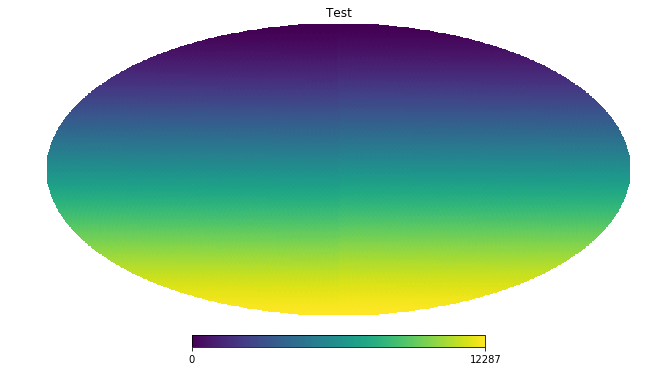

In [16]:
import numpy as np
import healpy as hp
import astropy as ap
import matplotlib.pyplot as plt
from astropy.io import fits
import glob
NSIDE=32
m=np.arange(hp.nside2npix(NSIDE))
print m.shape, m[0:10], m[m.shape[0]-10:m.shape[0]]
hp.mollview(m, title="Test")

In [2]:
from HERA_MapMaking_VisibilitySimulation import DATA_PATH
print (DATA_PATH)

pyuvdata: /Users/JianshuLi/anaconda3/envs/Cosmology-Python27/lib/python2.7/site-packages/HERA_MapMaking_VisibilitySimulation
version_file: /Users/JianshuLi/anaconda3/envs/Cosmology-Python27/lib/python2.7/site-packages/HERA_MapMaking_VisibilitySimulation/VERSION
version: 1.0.0
Exception: git_version.
Programme Starts at: 2018-07-06 16:23:10.856634
/Users/JianshuLi/anaconda3/envs/Cosmology-Python27/lib/python2.7/site-packages/HERA_MapMaking_VisibilitySimulation/data


In [4]:
outfile_GSM_name = DATA_PATH + '/Results_Fits_w-Data-CG-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-150.73-gW-0.048978-150.7324MHz-dipole-nubl990-nt1530-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-32-rescale-1.000-Deg-unlimit-All-S-non-recond-N-774.44.fits'
map_1 = fits.getdata(outfile_GSM_name).squeeze()

Filename: /Users/JianshuLi/anaconda3/envs/Cosmology-Python27/lib/python2.7/site-packages/HERA_MapMaking_VisibilitySimulation/data/Results_Fits_w-Data-CG-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-150.73-gW-0.048978-150.7324MHz-dipole-nubl990-nt1530-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-32-rescale-1.000-Deg-unlimit-All-S-non-recond-N-774.44.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   (12288,)   float64   
Data shape, min, max:  (12288,) -139.58774575294163 1084.8540418213663


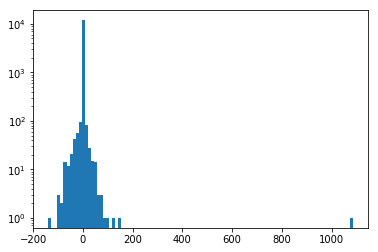

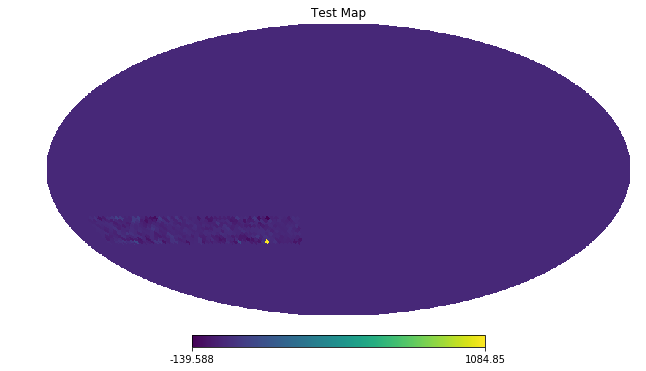

In [14]:
# hdul = fits.open('test.fits')
hdul = fits.open(outfile_GSM_name)
hdul.info()
hdr = hdul[0].header
data = hdul[0].data
hdr
print 'Data shape, min, max: ',data.shape, min(data), max(data)
testmap = fits.getdata(outfile_GSM_name)
plt.hist(testmap,bins=100, log=True)
hp.mollview(testmap, nest=True, title="Test Map")

80.0 160.0 -46.1880215352 46.1880215352
The interval between parallels is 10 deg 0.00'.
The interval between meridians is 10 deg 0.00'.


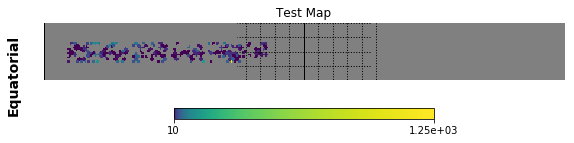

In [10]:
hp.cartview(testmap, title="Test Map", norm='log', min=10, max=1250, coord='C', latra=[-50,-10],xsize=360, nest=True)
hp.graticule(dpar=10,dmer=10)

In [37]:
filenames_32 = sorted(glob.glob("{0}/../data/results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-*-gW-0.048978-*-dipole-*-*-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-32-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits".format(DATA_PATH)))

In [35]:
filenames_64 = sorted(glob.glob("{0}/../data/results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-*-gW-0.048978-*-dipole-*-*-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-64-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits".format(DATA_PATH)))

In [48]:
filenames_32_321 = sorted(glob.glob("{0}/../data/results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD321-NJD1-Nf18-*-gW-0.048978-*-dipole-*-*-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-32-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits".format(DATA_PATH)))

In [47]:
filenames_64_321 = sorted(glob.glob("{0}/../data/results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD321-NJD1-Nf18-*-gW-0.048978-*-dipole-*-*-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-64-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits".format(DATA_PATH)))

In [49]:
filenames_32_321[0].split('/')[-1]

'results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD321-NJD1-Nf18-110.11-gW-0.048978-110.1074MHz-dipole-nubl990-nt1041-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-32-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits'

(0, 'results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-110.11-gW-0.048978-110.1074MHz-dipole-nubl990-nt1578-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-32-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
(1, 'results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-119.48-gW-0.048978-119.4824MHz-dipole-nubl990-nt1341-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-32-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
(2, 'results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-130.42-gW-0.048978-130.4199MHz-dipole-nubl990-nt1559-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-32-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
(3, 'results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-139.79-gW-0.048978-139.7949MHz-dipole-nubl990-nt1579-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-32-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
(4, 'results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-24580

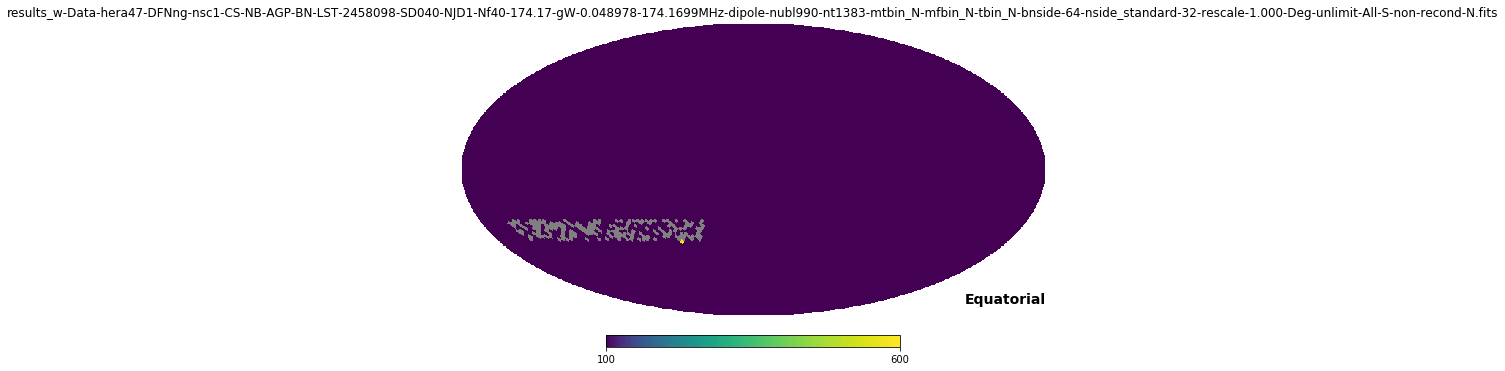

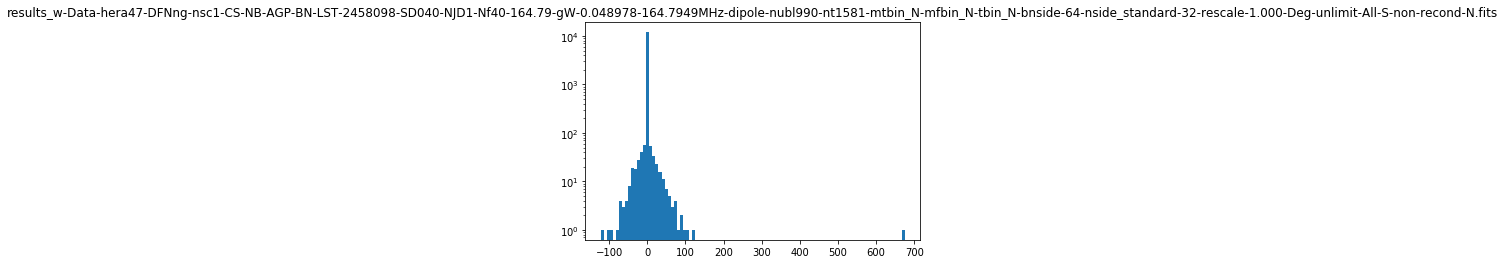

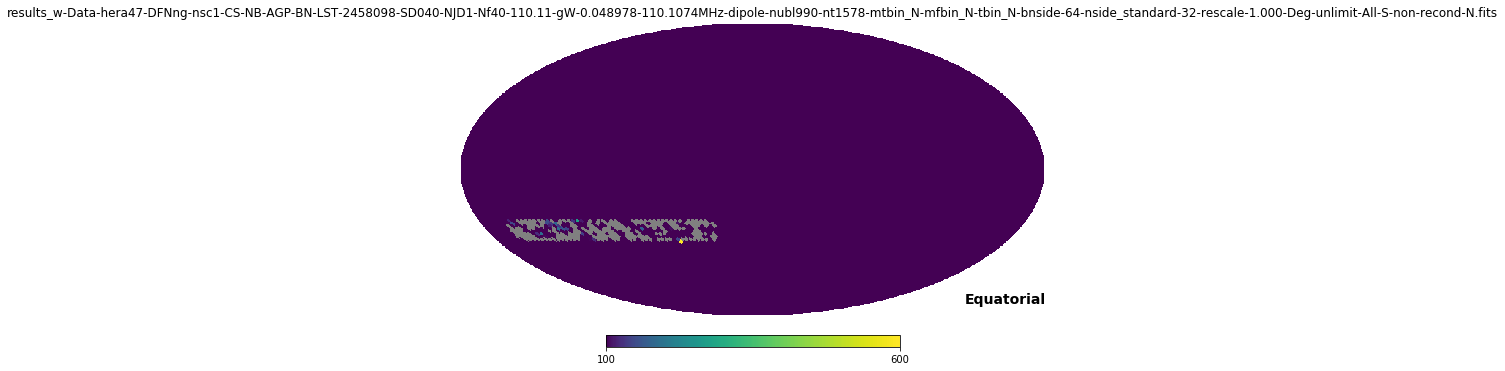

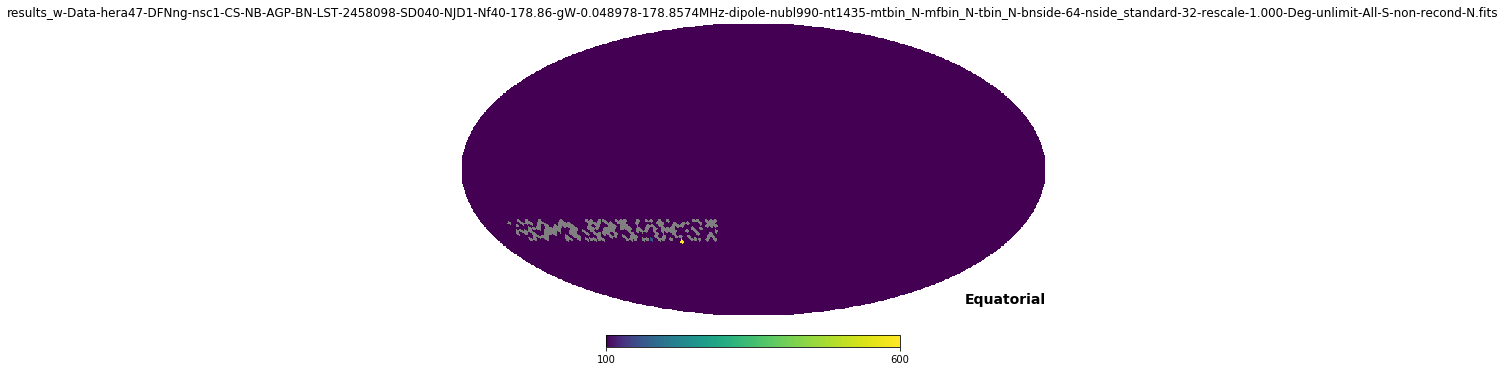

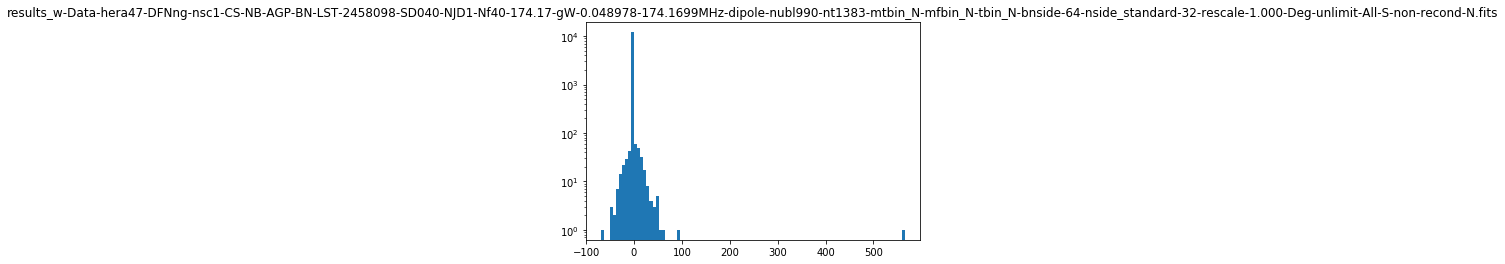

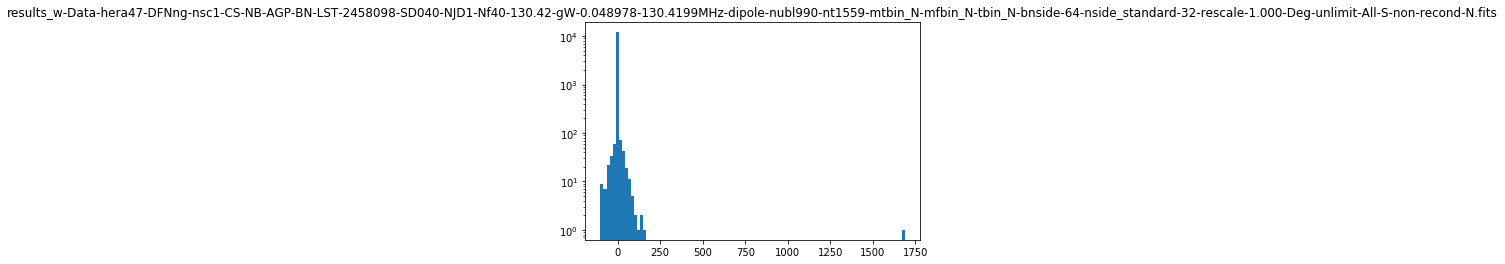

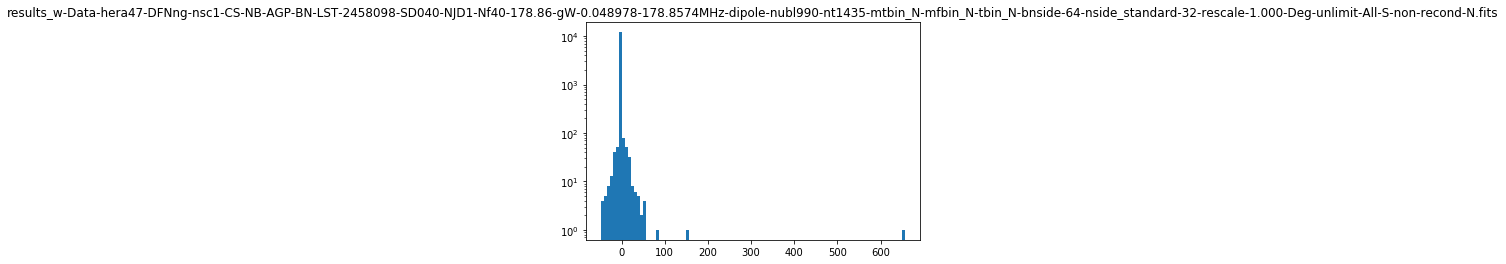

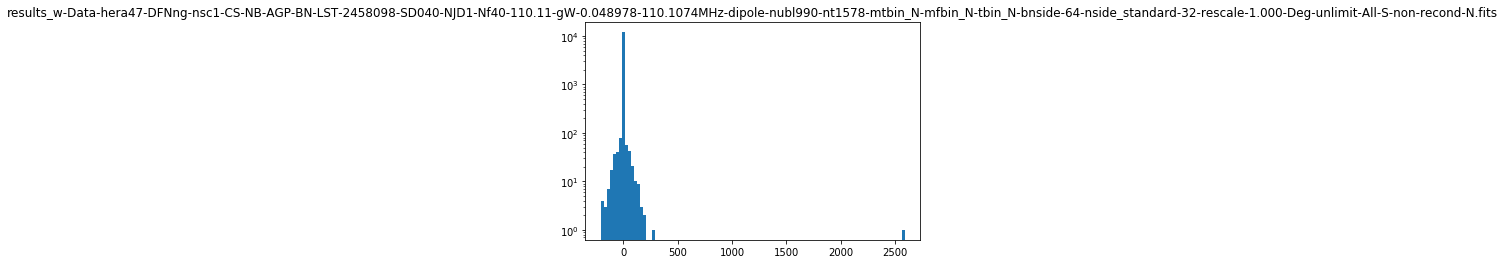

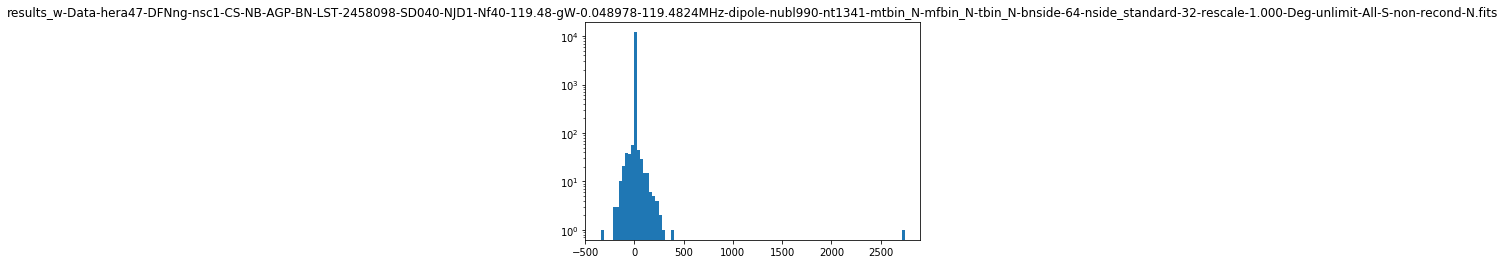

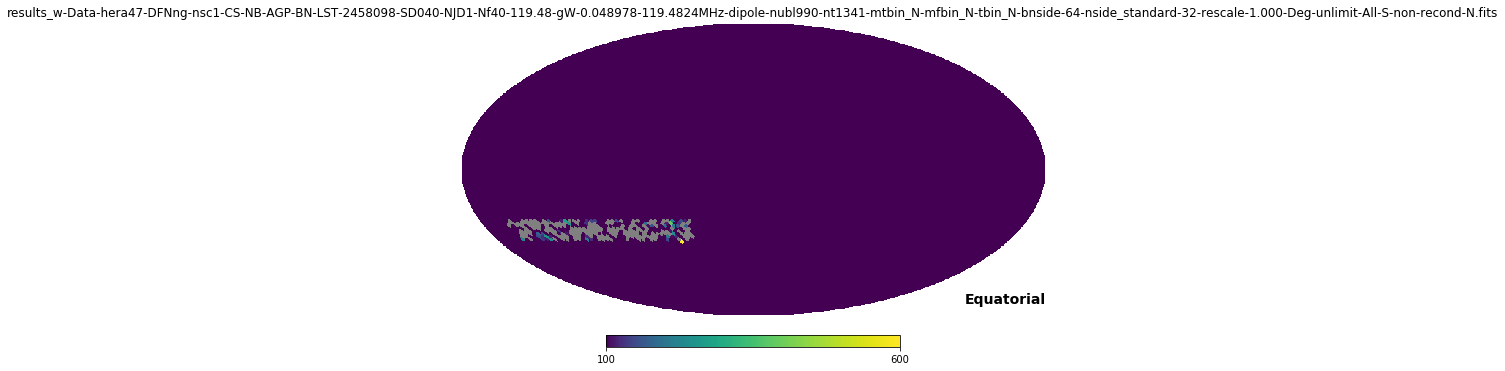

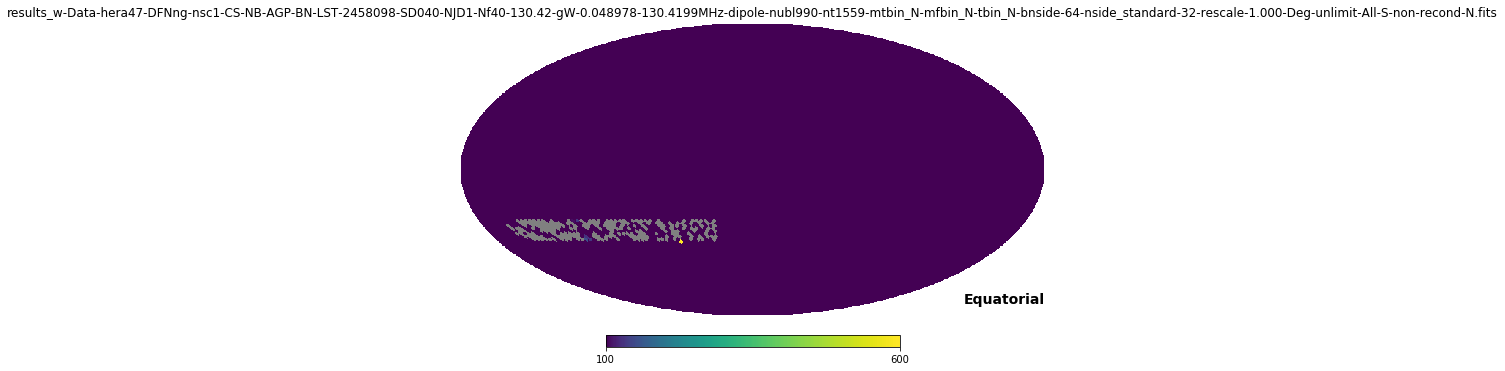

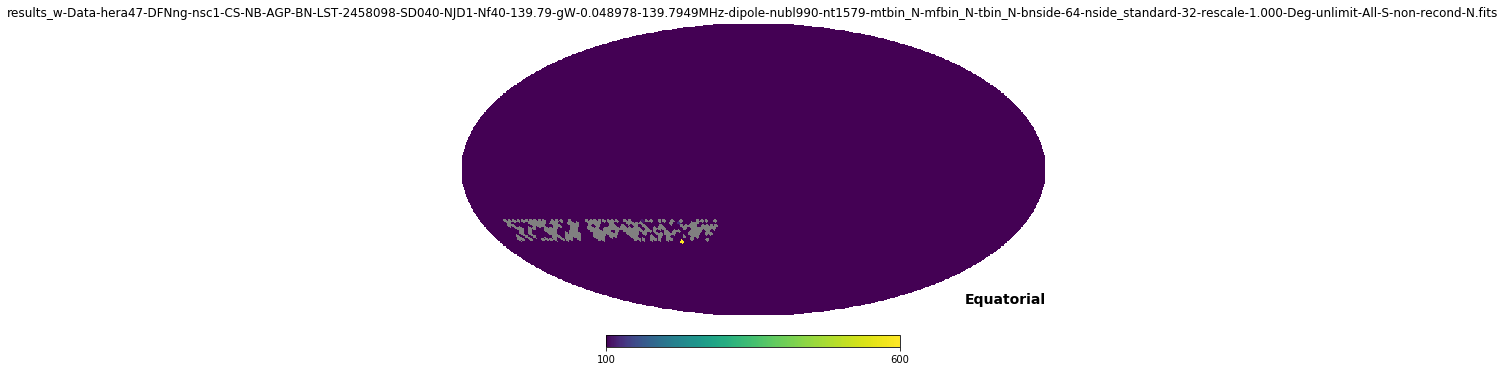

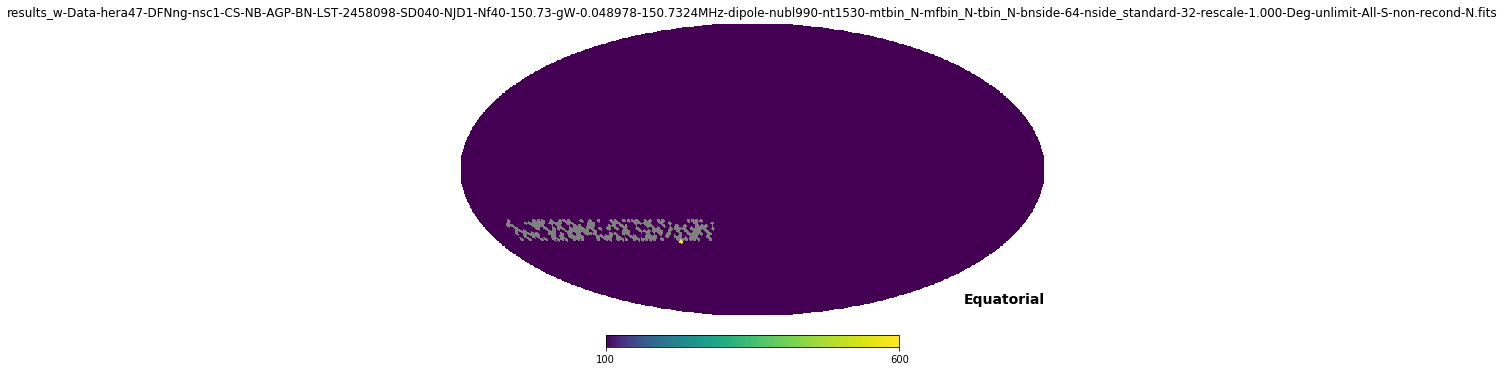

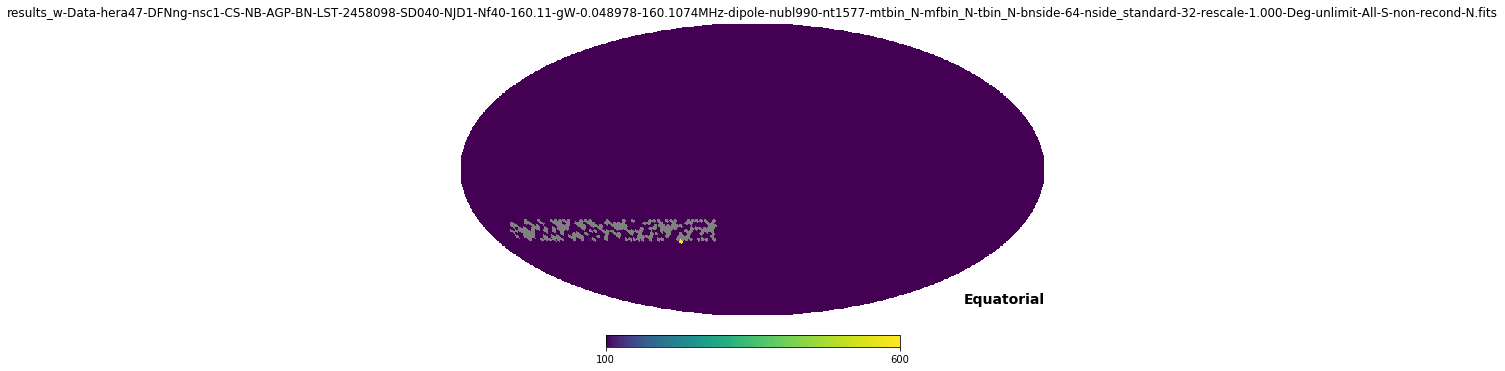

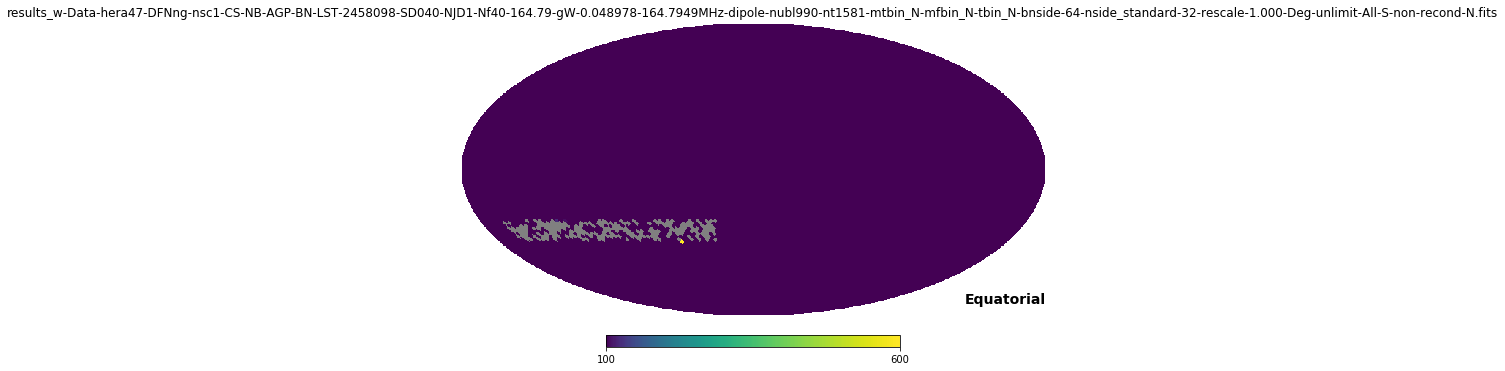

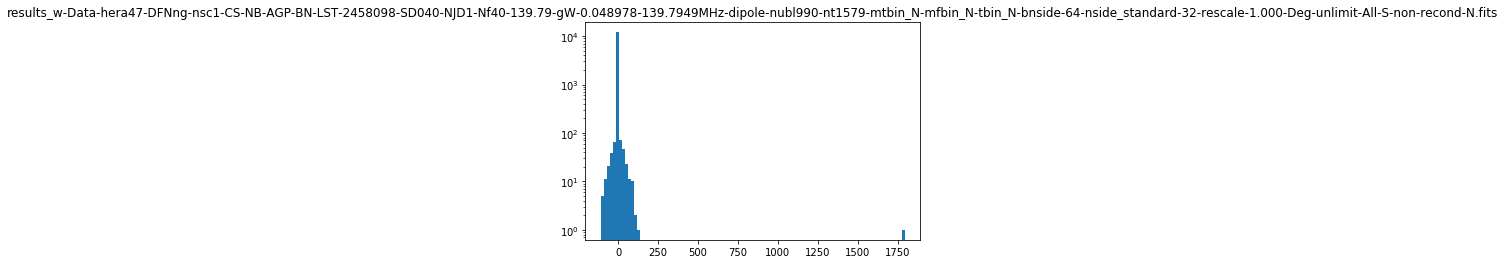

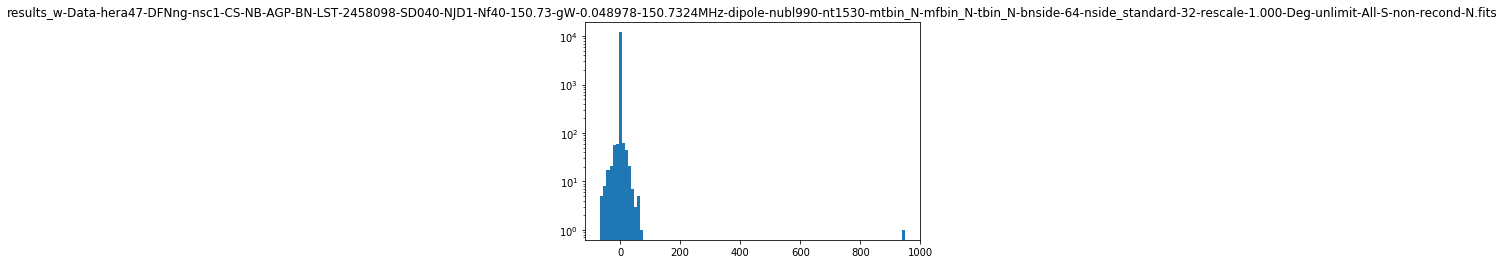

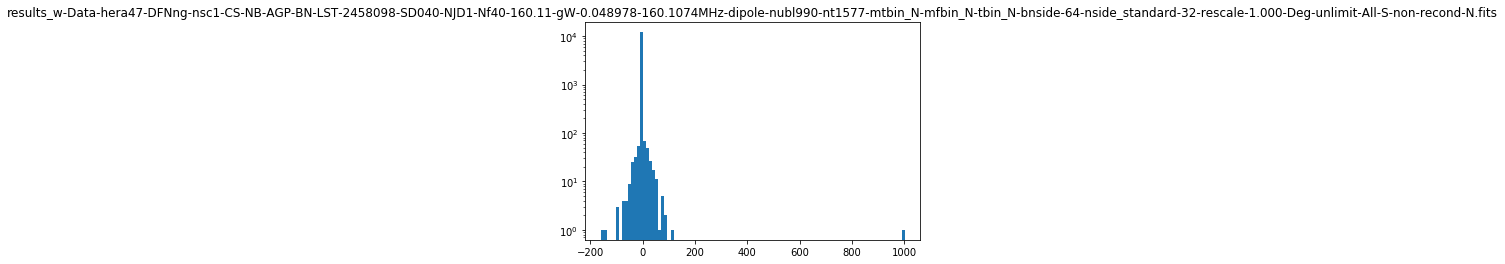

In [42]:
for id_file, fitfile in enumerate(filenames_32):
    name = fitfile.split('/')[-1]
    print(id_file, name)
    map_fit = fits.getdata(fitfile)
    plt.figure(10000 + id_file)
    plt.hist(map_fit, bins=100, log=True)
    plt.title(name)
    plt.show()
    #plt.close()
    plt.figure(50000 + id_file)
    hp.mollview(map_fit, title=name, norm='log', min=100, max=600, coord='C', nest=True)
    #hp.graticule(dmer=30., dpar=30.)
    plt.show()
    #plt.close()
    

(0, 'results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-110.11-gW-0.048978-110.1074MHz-dipole-nubl990-nt1578-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-64-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
(1, 'results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-119.48-gW-0.048978-119.4824MHz-dipole-nubl990-nt1341-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-64-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
(2, 'results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-130.42-gW-0.048978-130.4199MHz-dipole-nubl990-nt1559-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-64-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
(3, 'results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-139.79-gW-0.048978-139.7949MHz-dipole-nubl990-nt1579-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-64-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
(4, 'results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-24580

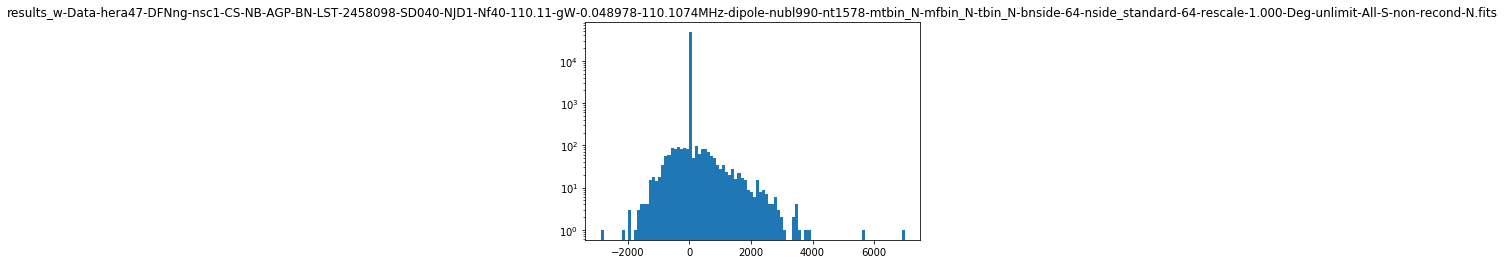

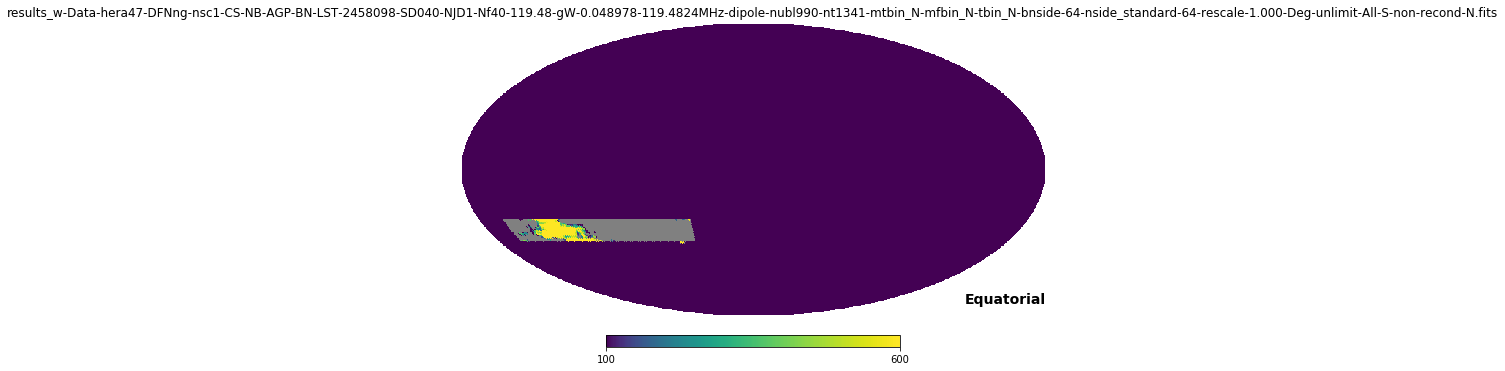

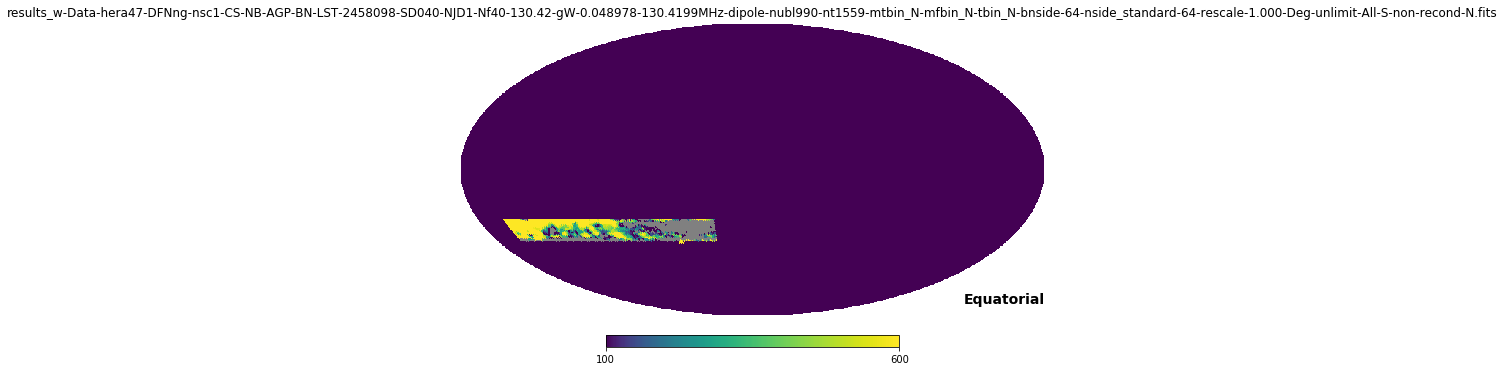

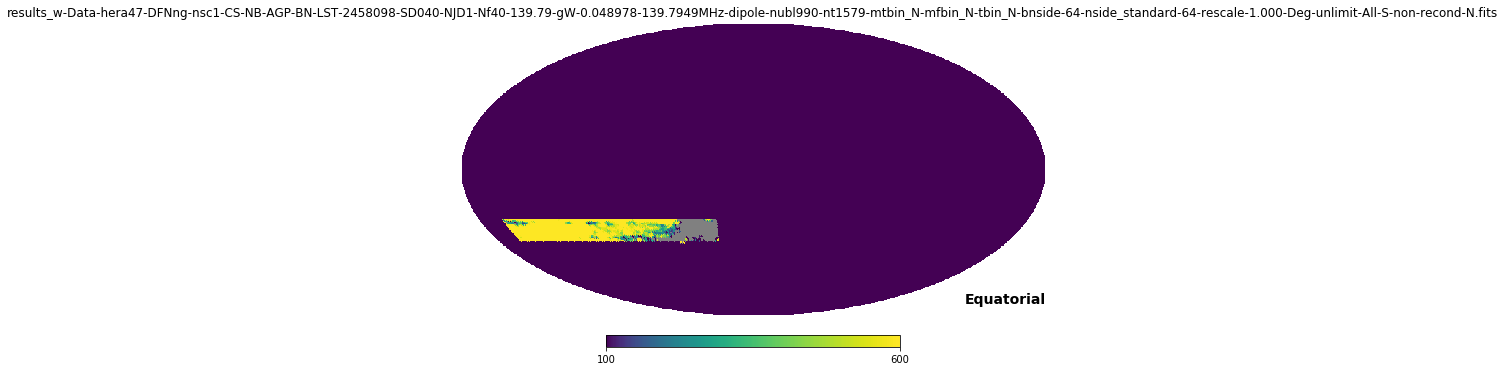

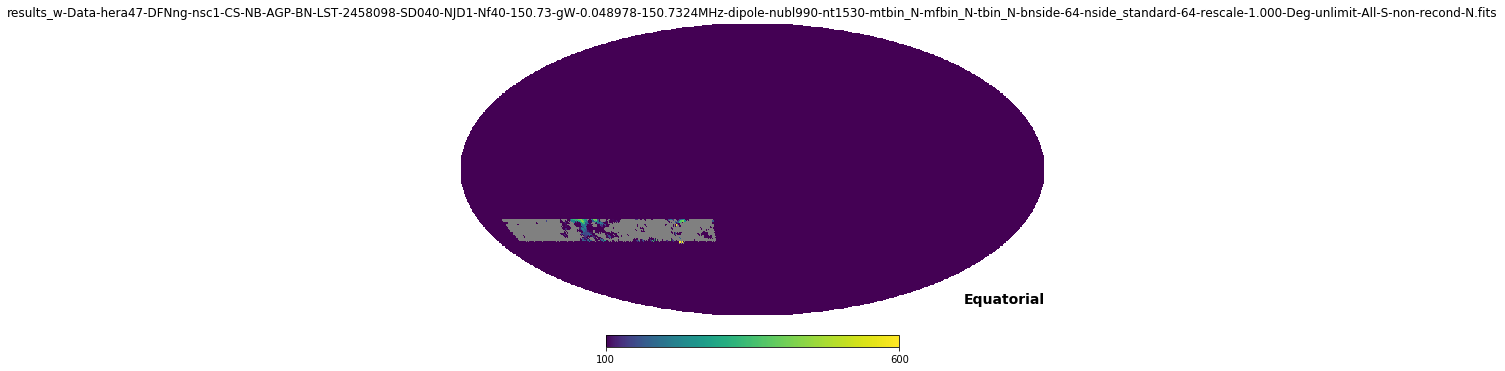

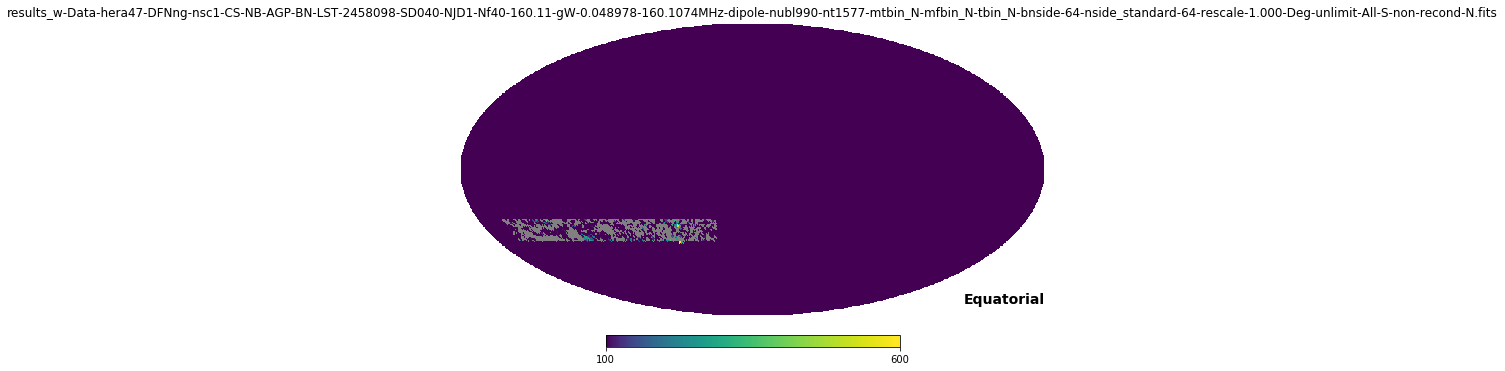

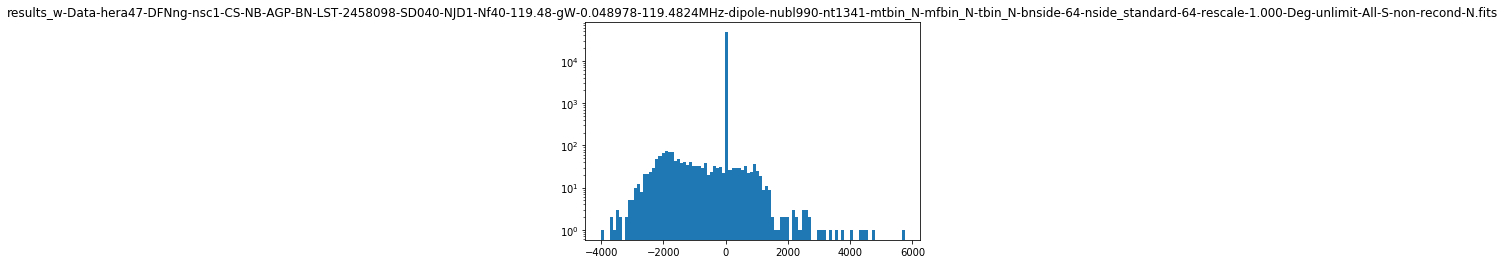

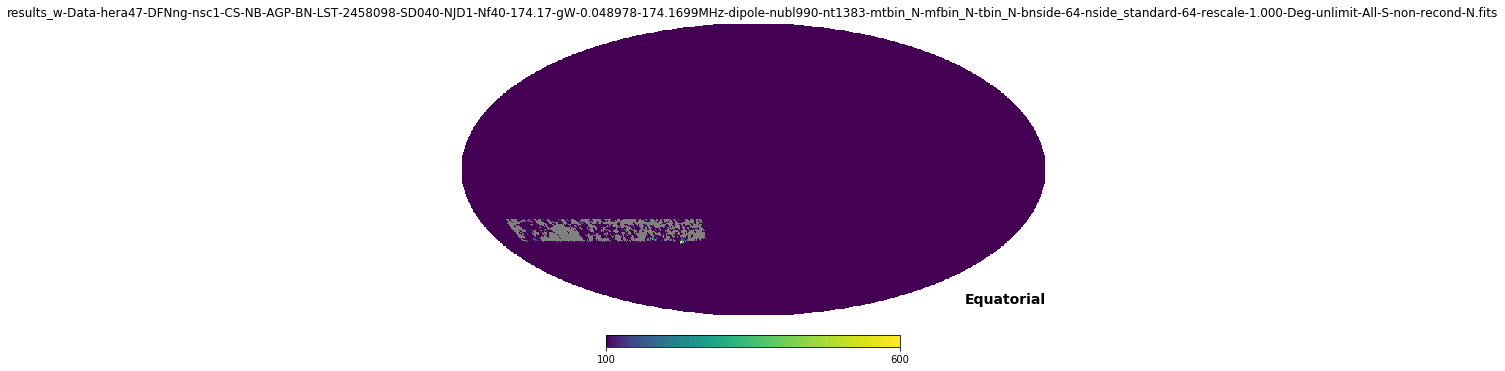

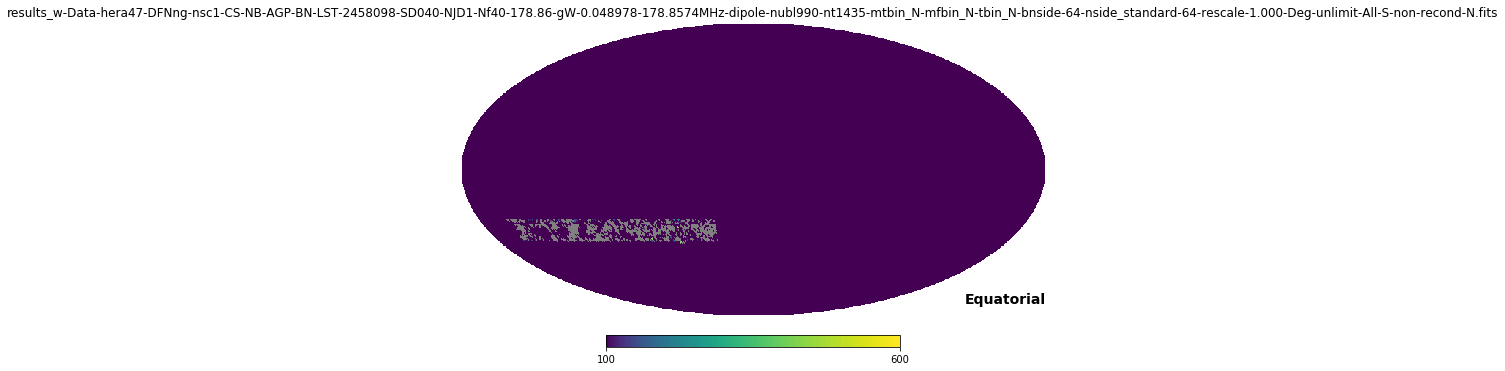

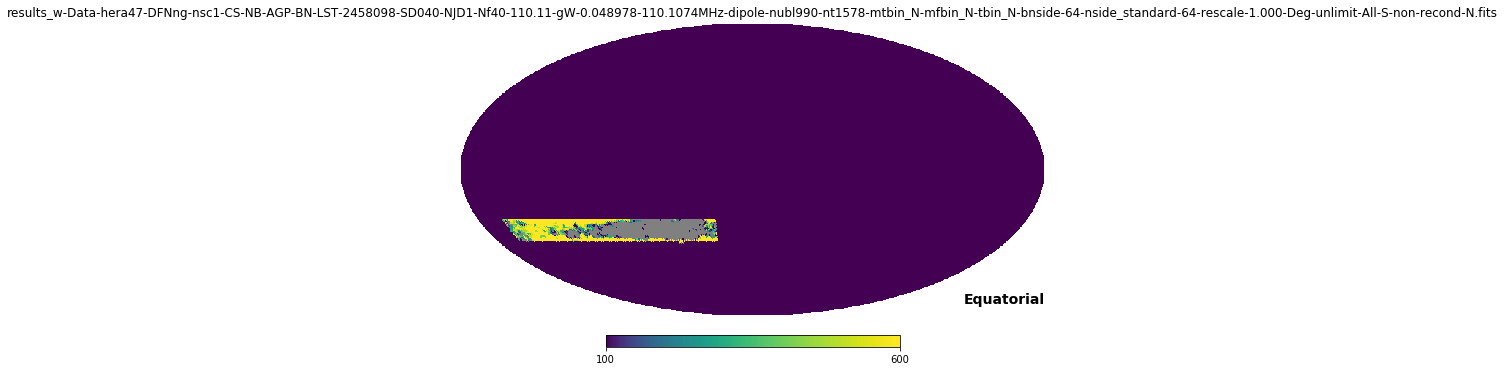

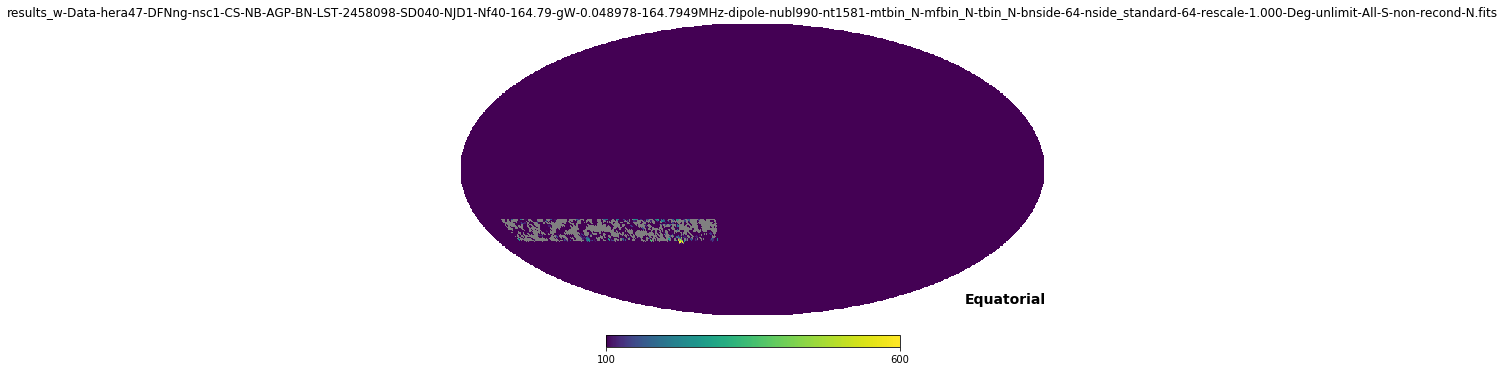

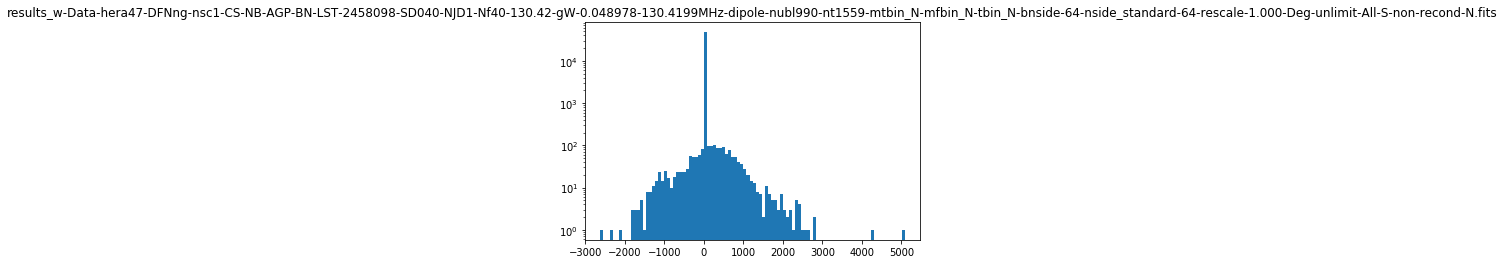

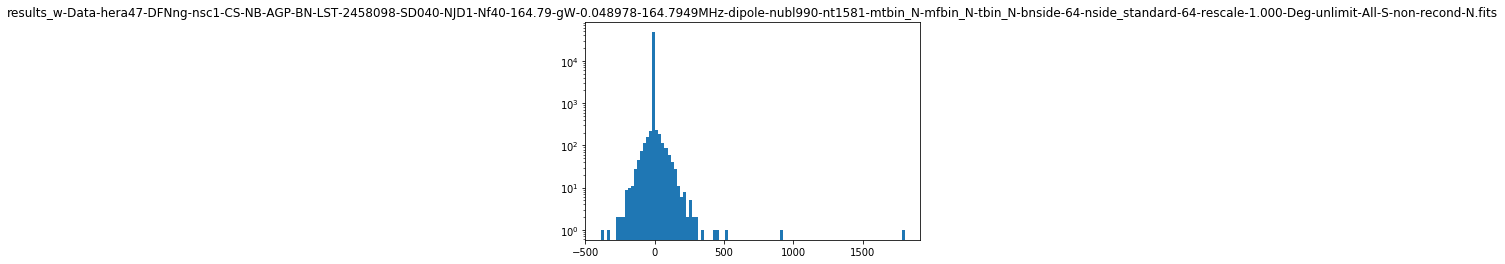

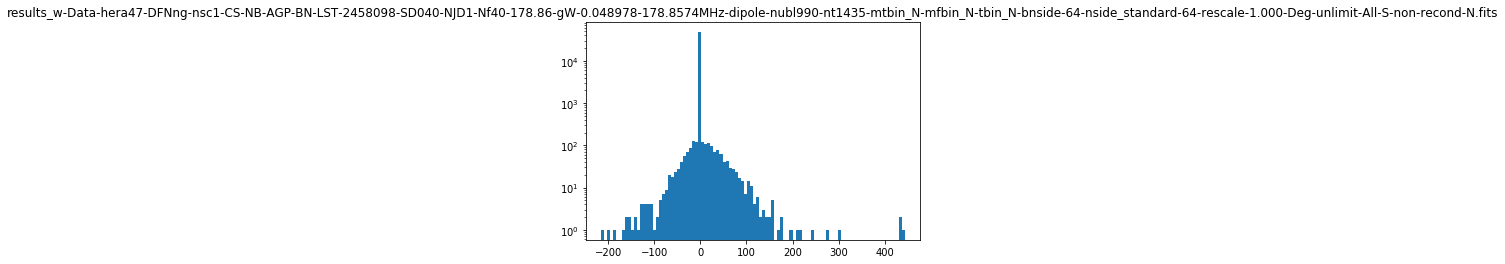

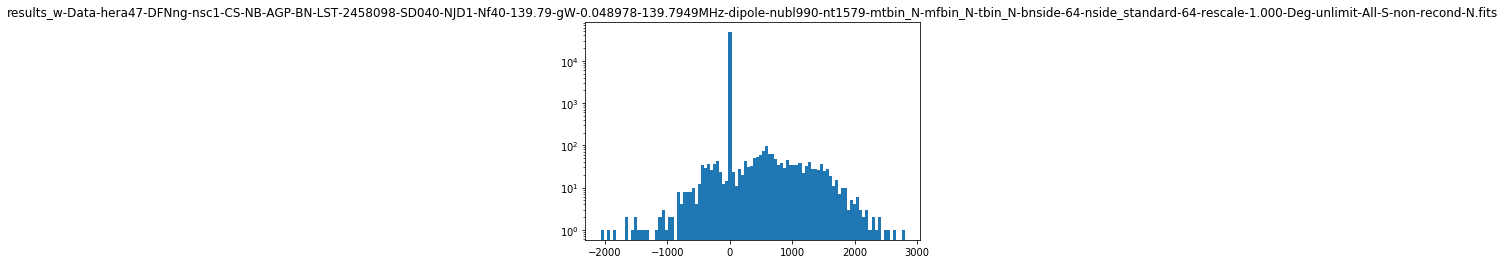

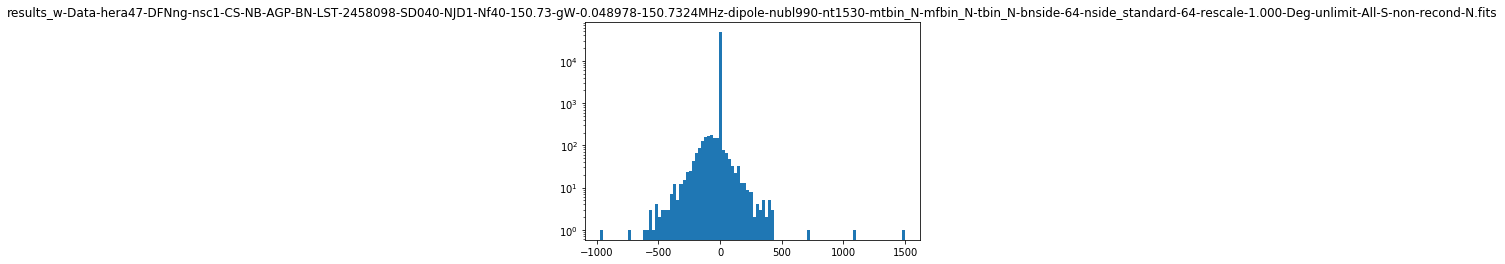

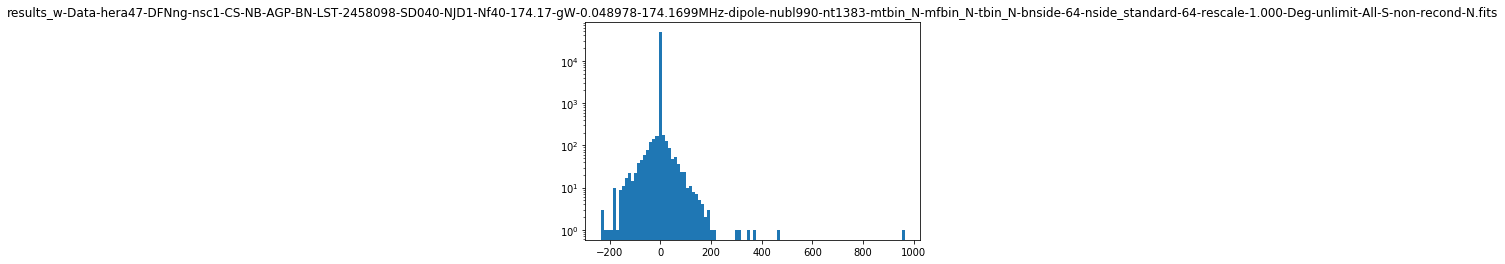

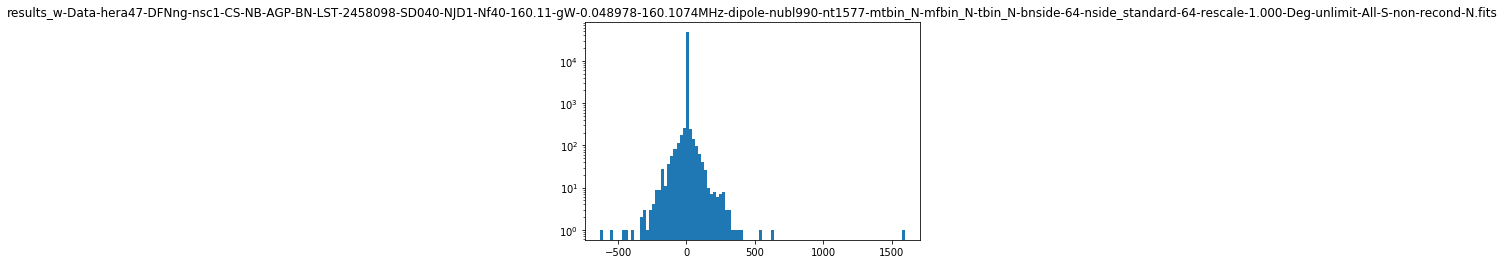

In [43]:
for id_file, fitfile in enumerate(filenames_64):
    name = fitfile.split('/')[-1]
    print(id_file, name)
    map_fit = fits.getdata(fitfile)
    plt.figure(100000 + id_file)
    plt.hist(map_fit, bins=100, log=True)
    plt.title(name)
    plt.show()
    #plt.close()
    plt.figure(500000 + id_file)
    hp.mollview(map_fit, title=name, norm='log', min=100, max=600, coord='C', nest=True)
    #hp.graticule(dmer=30., dpar=30.)
    plt.show()
    #plt.close()

(0, 'results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD321-NJD1-Nf18-110.11-gW-0.048978-110.1074MHz-dipole-nubl990-nt1041-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-32-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
(1, 'results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD321-NJD1-Nf18-119.48-gW-0.048978-119.4824MHz-dipole-nubl990-nt803-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-32-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
(2, 'results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD321-NJD1-Nf18-130.42-gW-0.048978-130.4199MHz-dipole-nubl990-nt1031-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-32-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
(3, 'results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD321-NJD1-Nf18-139.79-gW-0.048978-139.7949MHz-dipole-nubl990-nt1038-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-32-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
(4, 'results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-245809

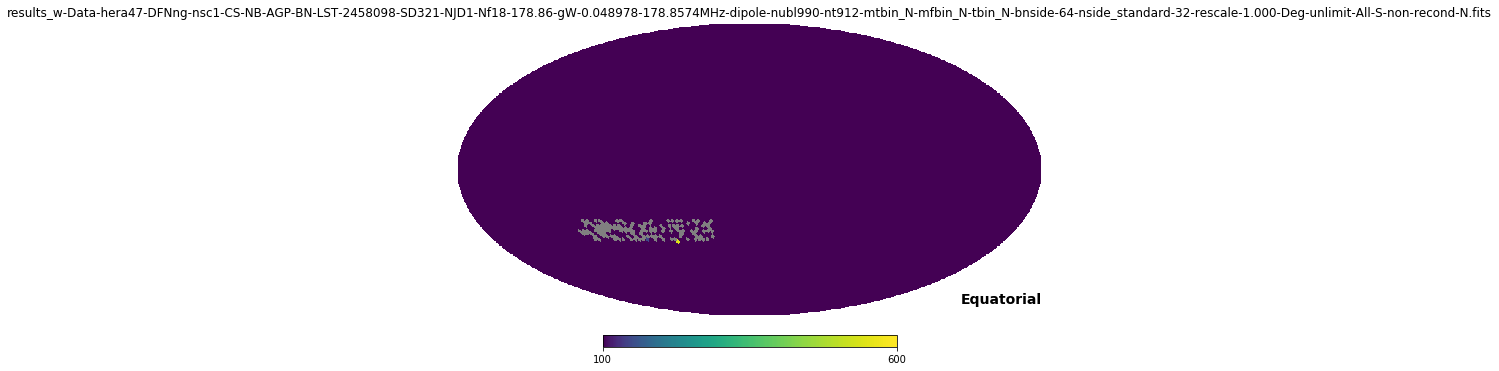

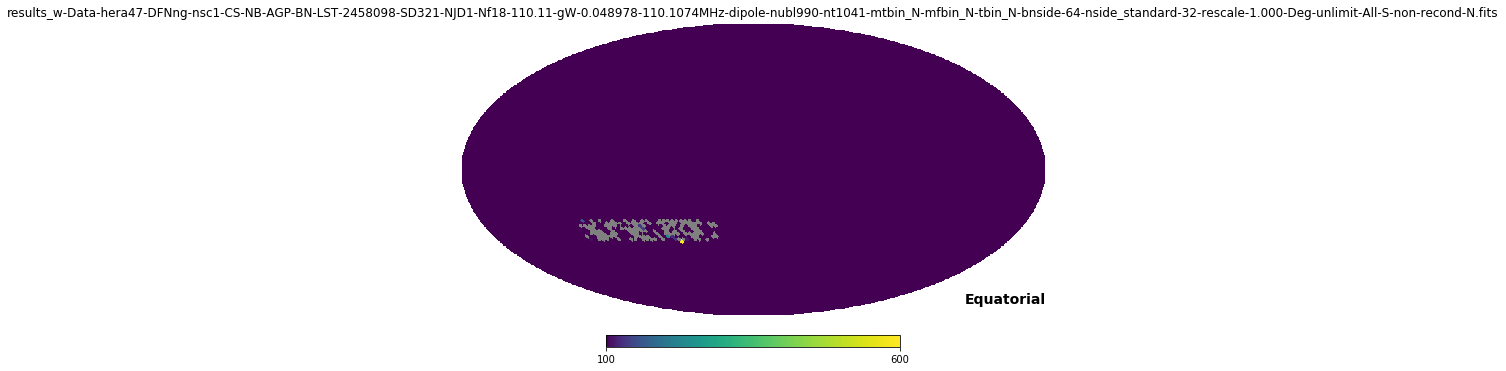

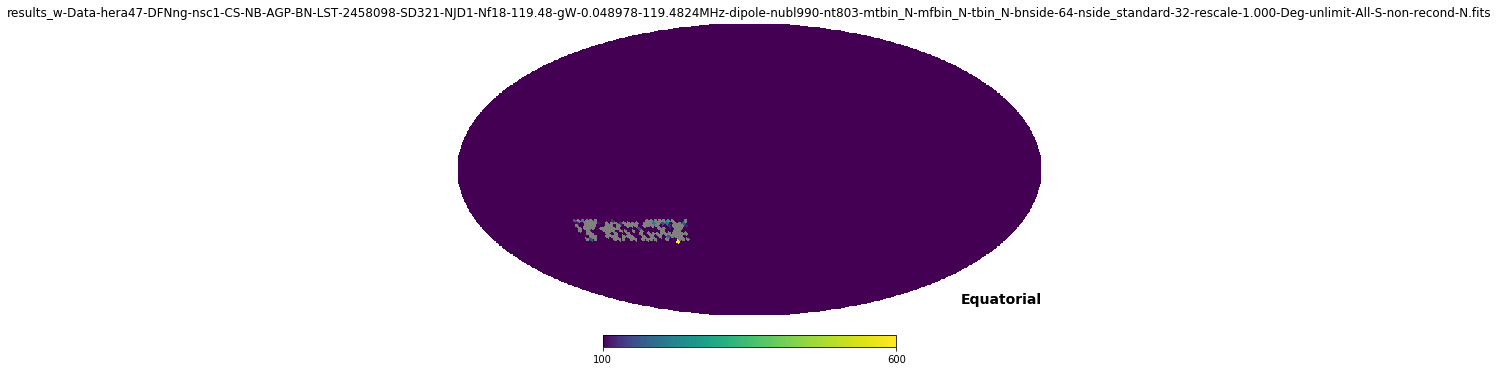

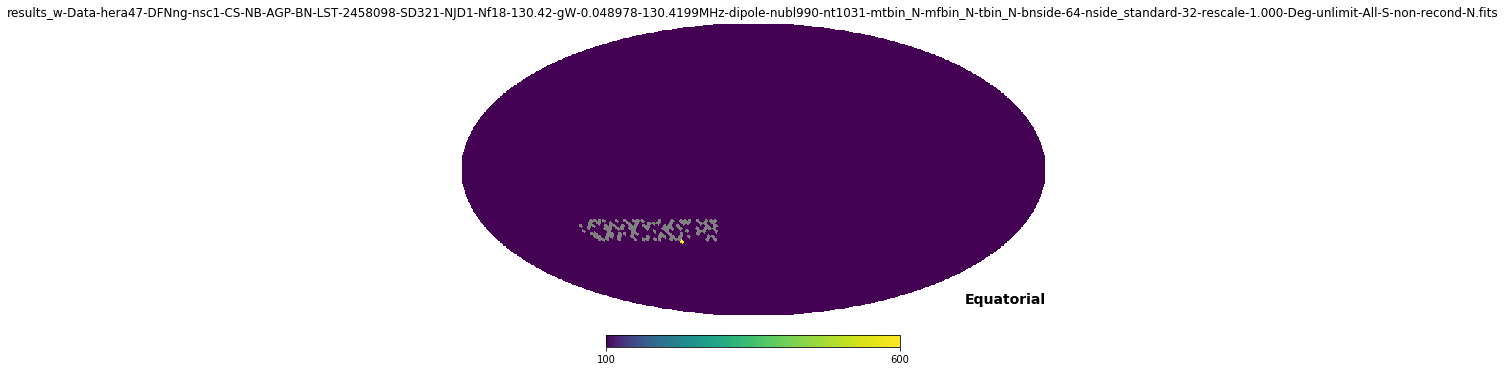

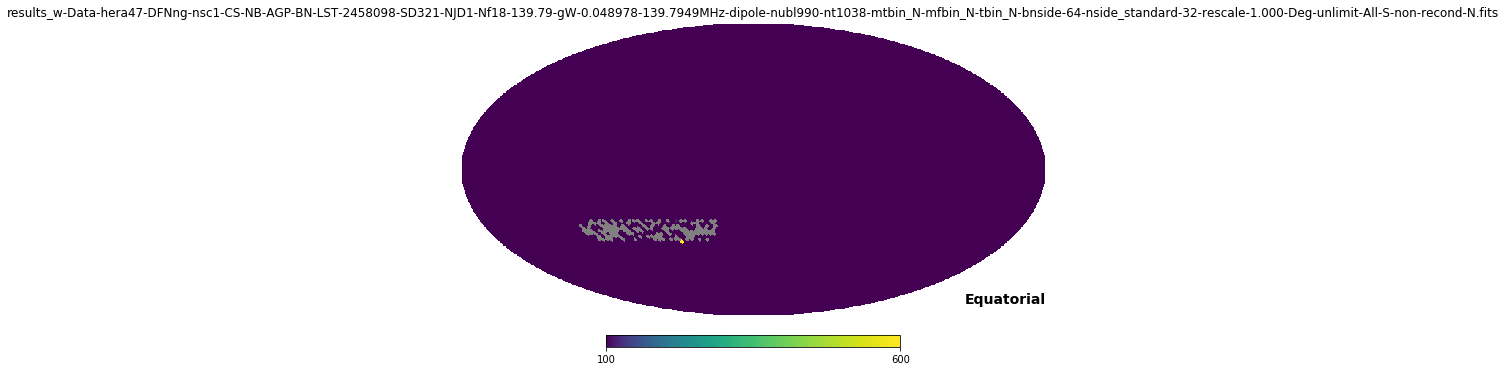

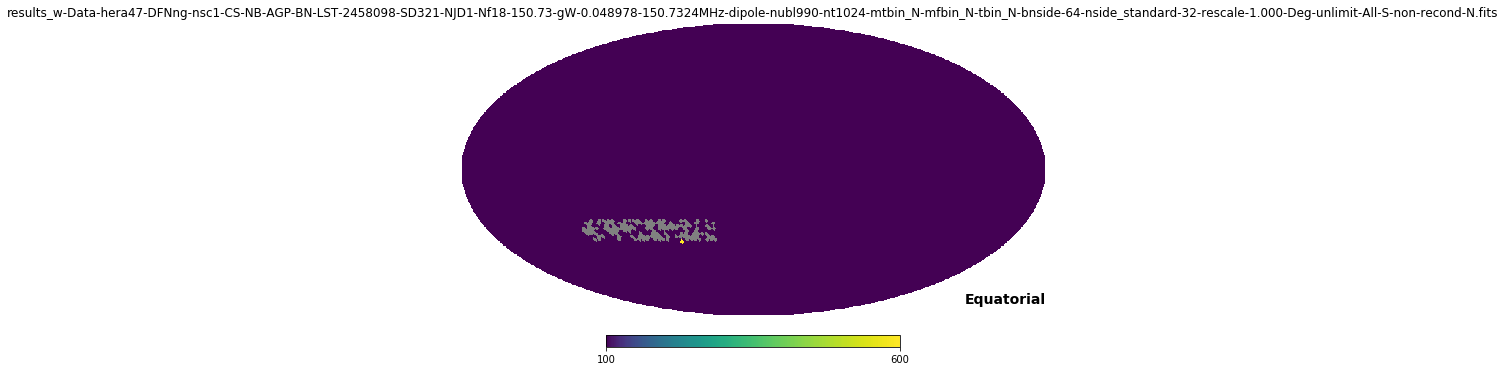

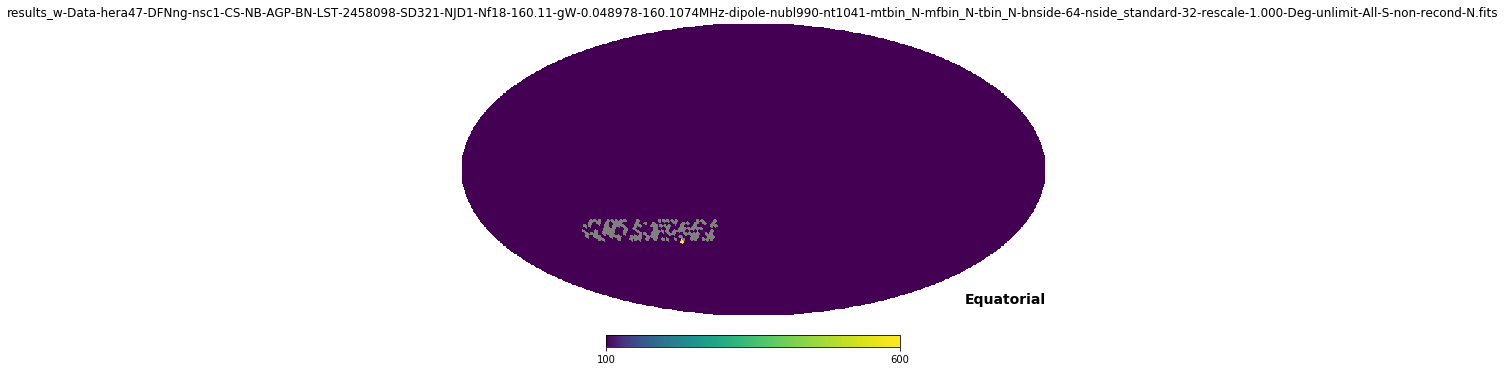

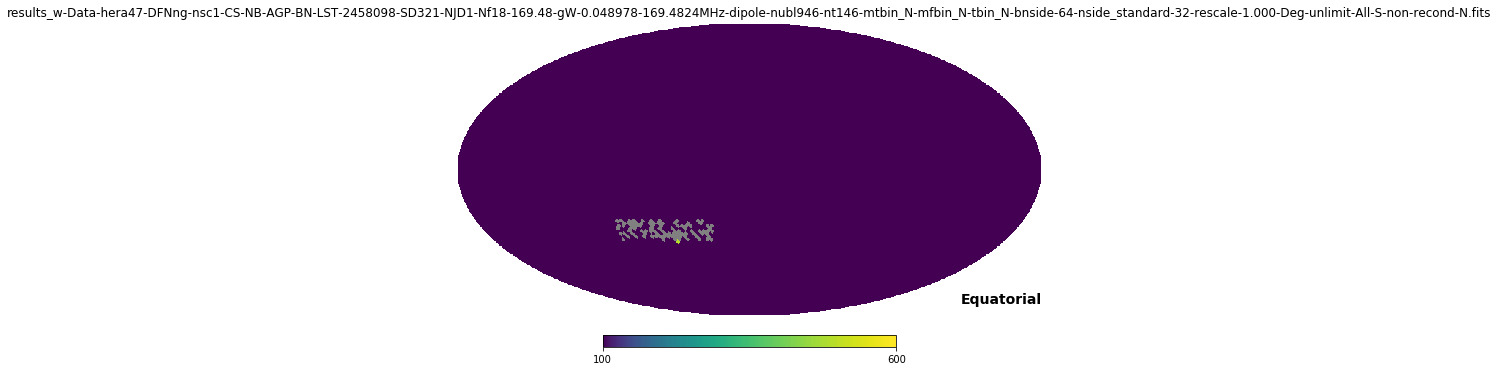

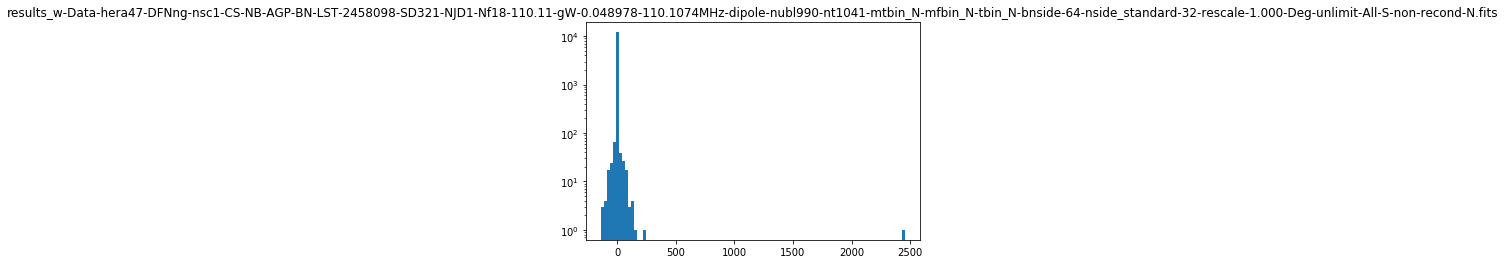

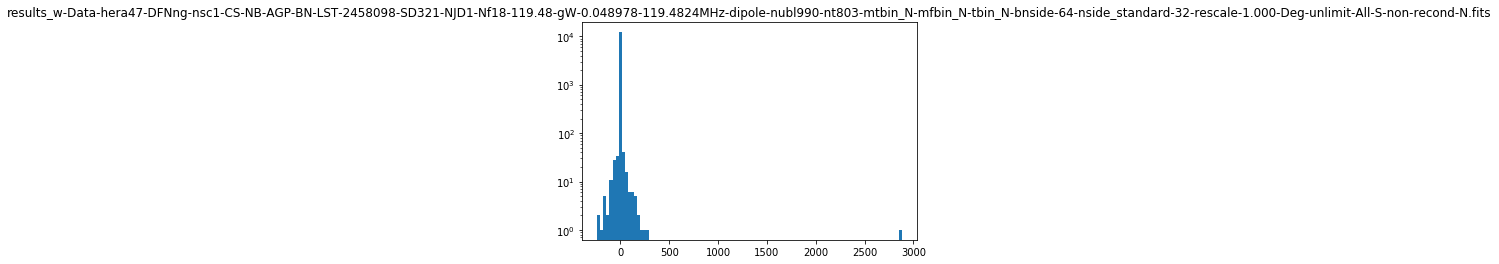

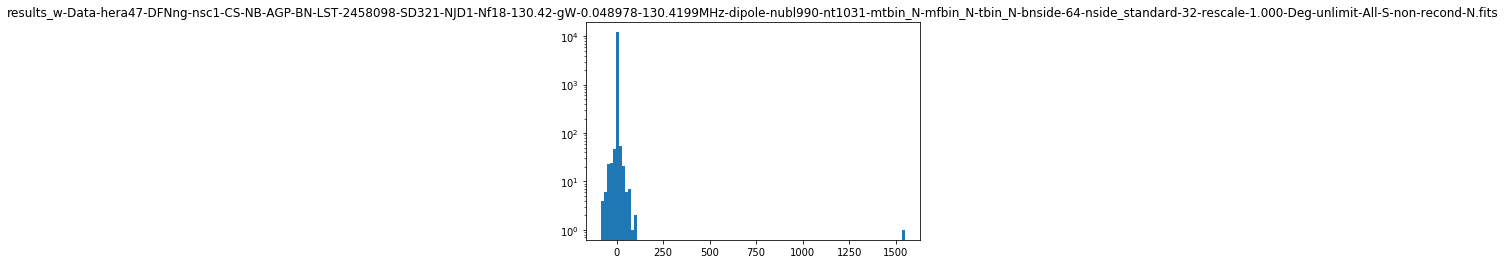

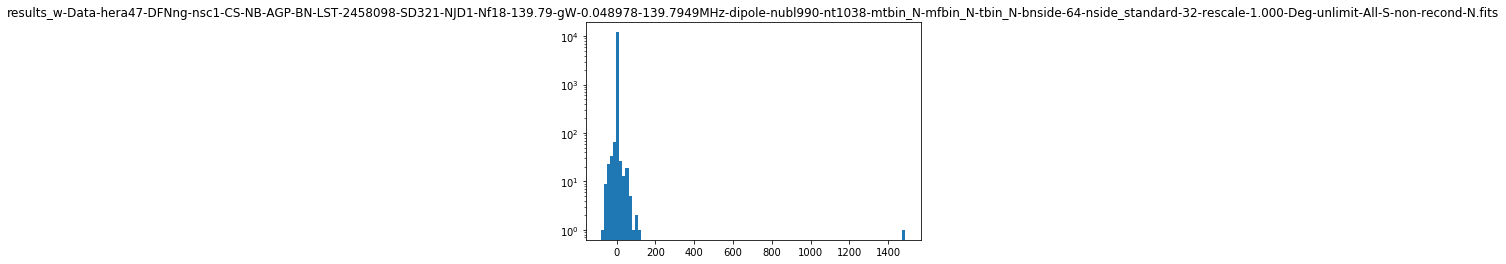

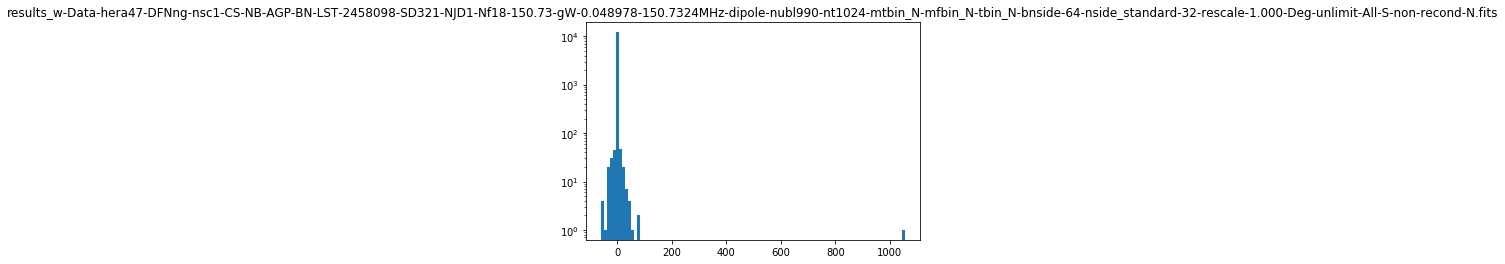

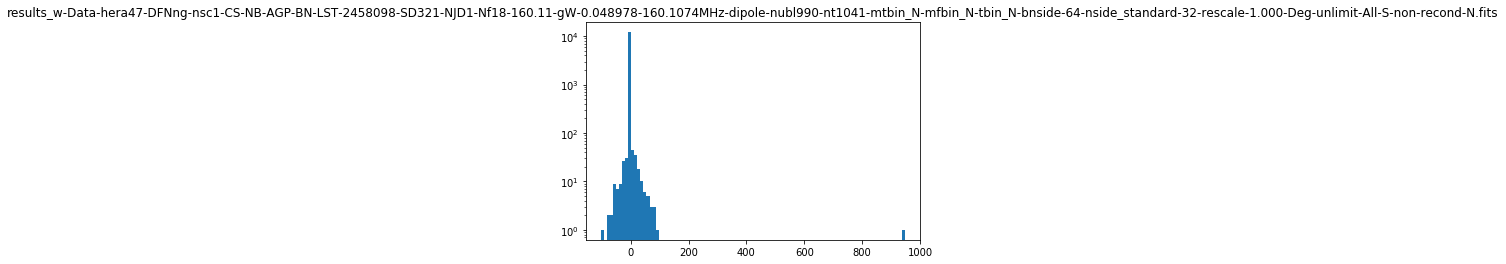

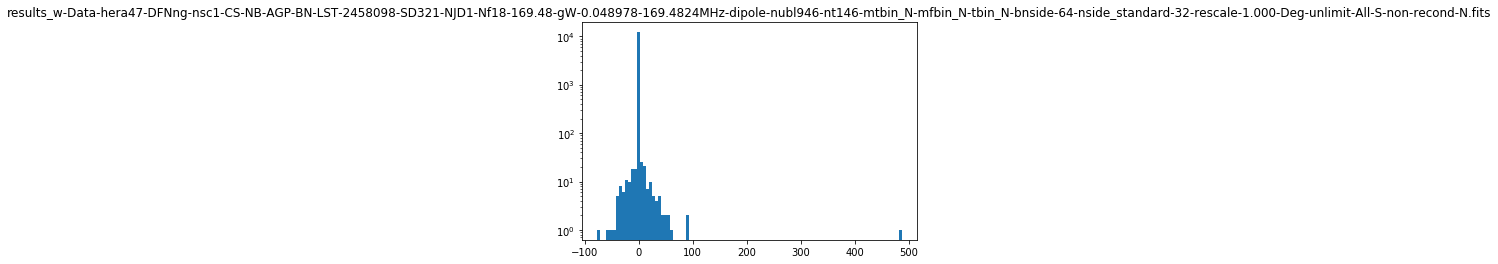

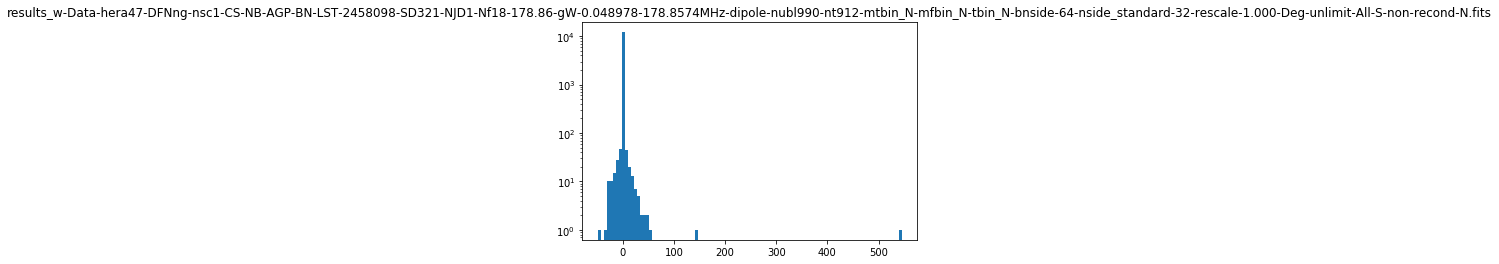

In [50]:
for id_file, fitfile in enumerate(filenames_32_321):
    name = fitfile.split('/')[-1]
    print(id_file, name)
    map_fit = fits.getdata(fitfile)
    plt.figure(15000 + id_file)
    plt.hist(map_fit, bins=100, log=True)
    plt.title(name)
    plt.show()
    #plt.close()
    plt.figure(50000 + id_file)
    hp.mollview(map_fit, title=name, norm='log', min=100, max=600, coord='C', nest=True)
    #hp.graticule(dmer=30., dpar=30.)
    plt.show()
    #plt.close()

(0, 'results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD321-NJD1-Nf18-110.11-gW-0.048978-110.1074MHz-dipole-nubl990-nt1041-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-64-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
(1, 'results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD321-NJD1-Nf18-119.48-gW-0.048978-119.4824MHz-dipole-nubl990-nt803-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-64-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
(2, 'results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD321-NJD1-Nf18-130.42-gW-0.048978-130.4199MHz-dipole-nubl990-nt1031-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-64-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
(3, 'results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD321-NJD1-Nf18-139.79-gW-0.048978-139.7949MHz-dipole-nubl990-nt1038-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-64-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
(4, 'results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-245809

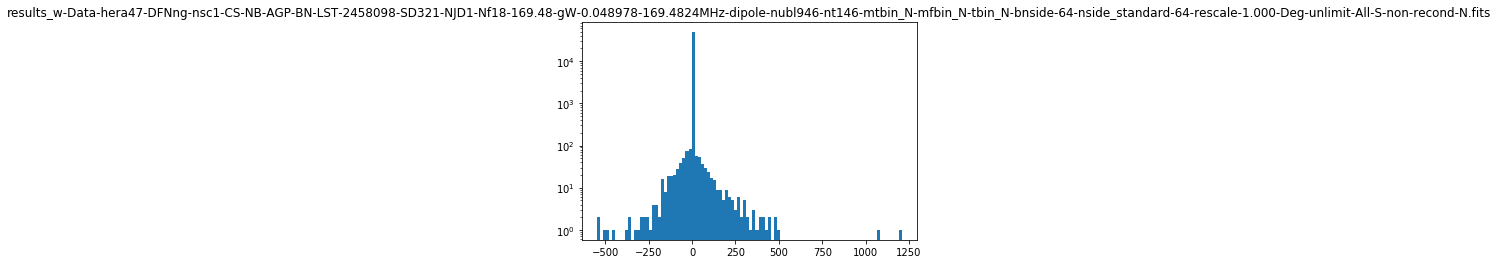

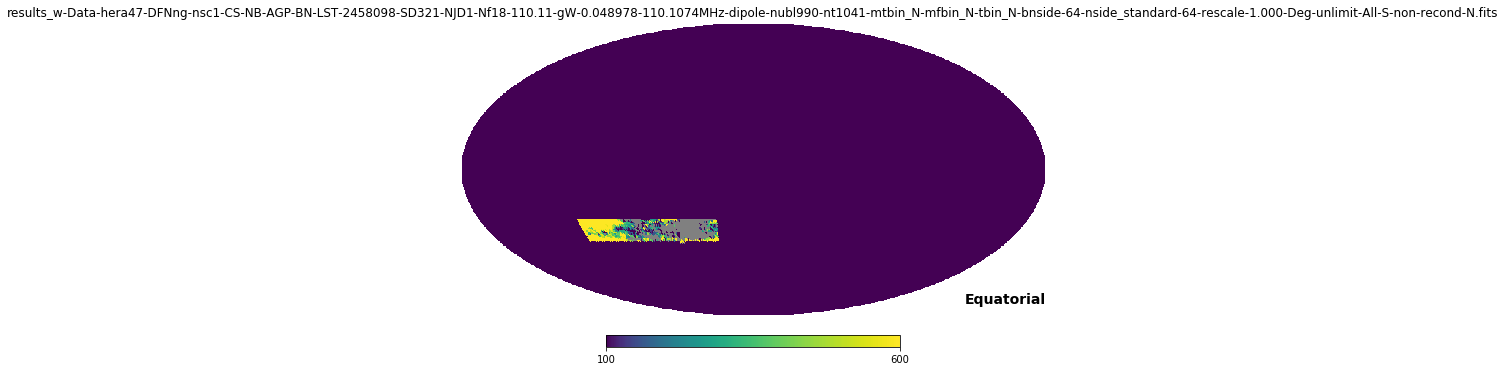

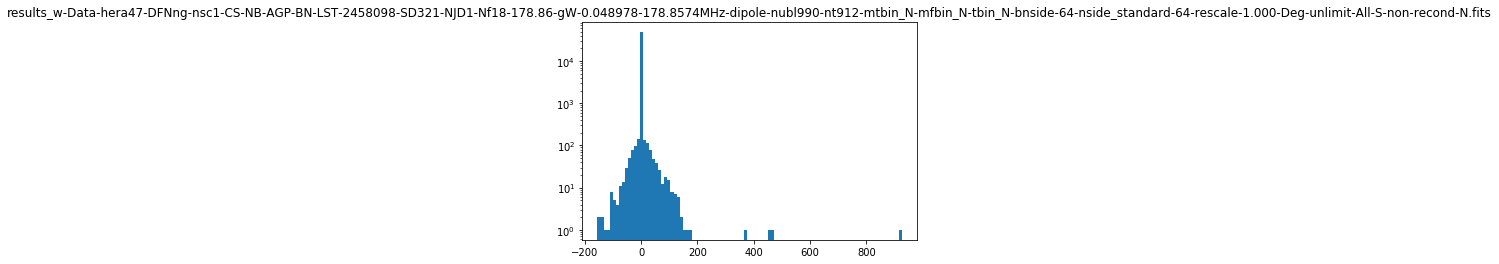

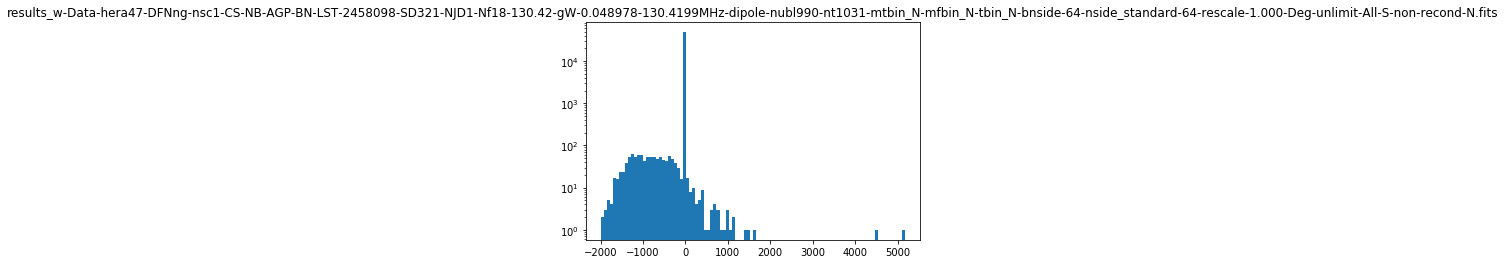

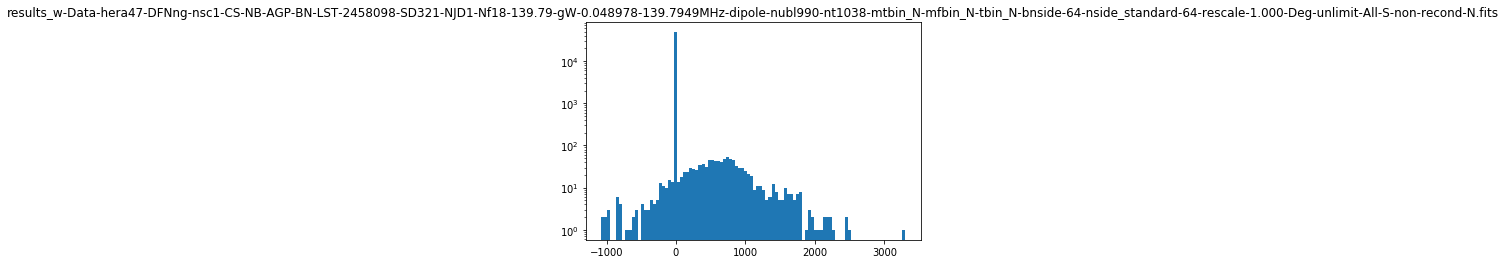

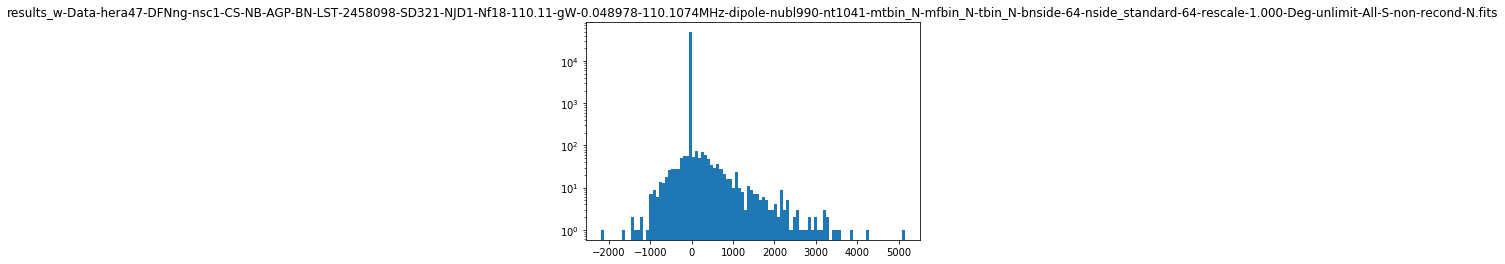

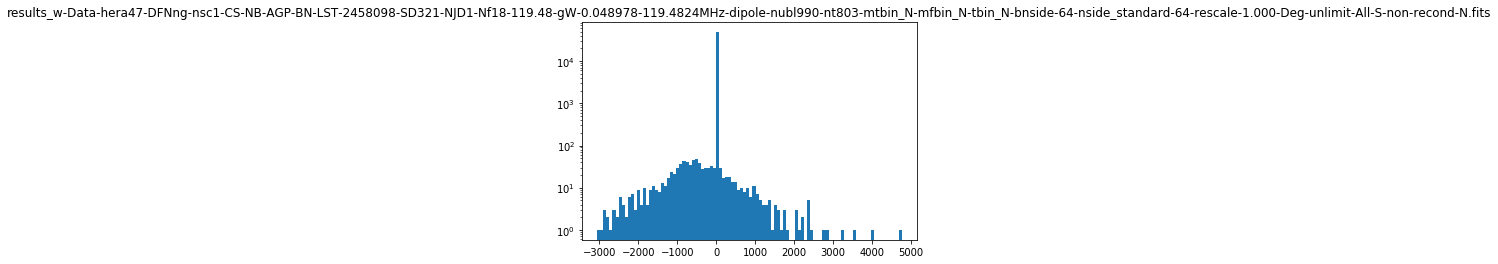

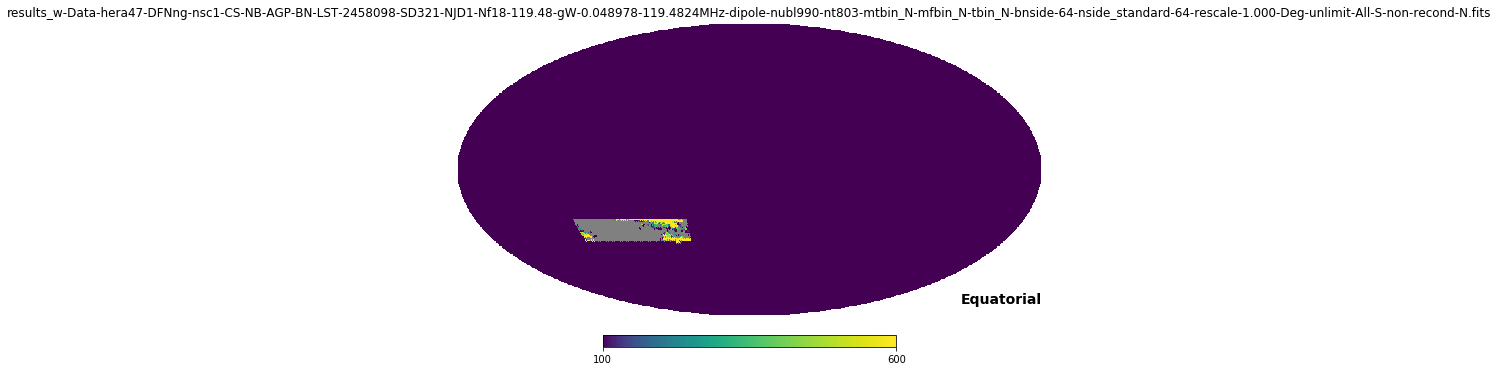

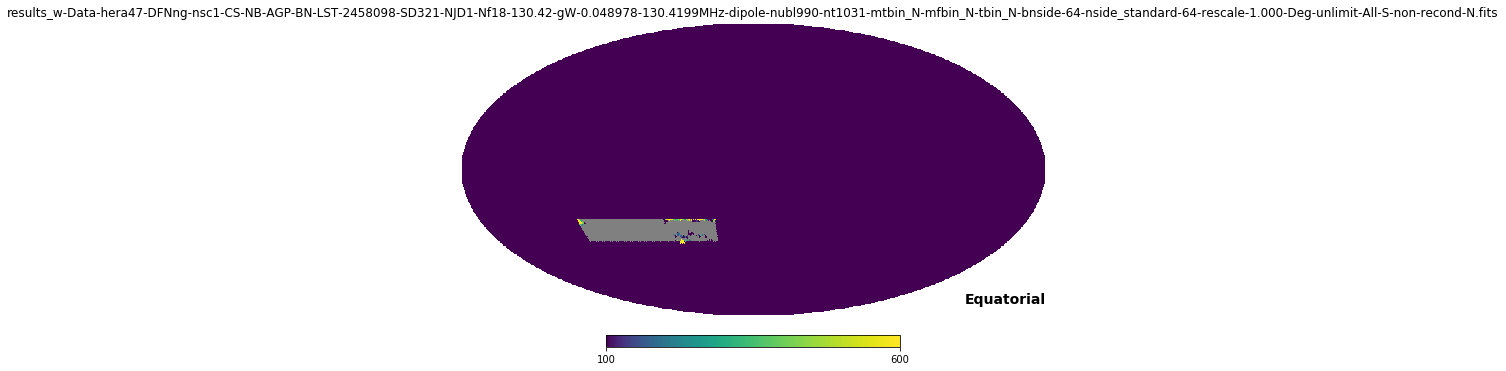

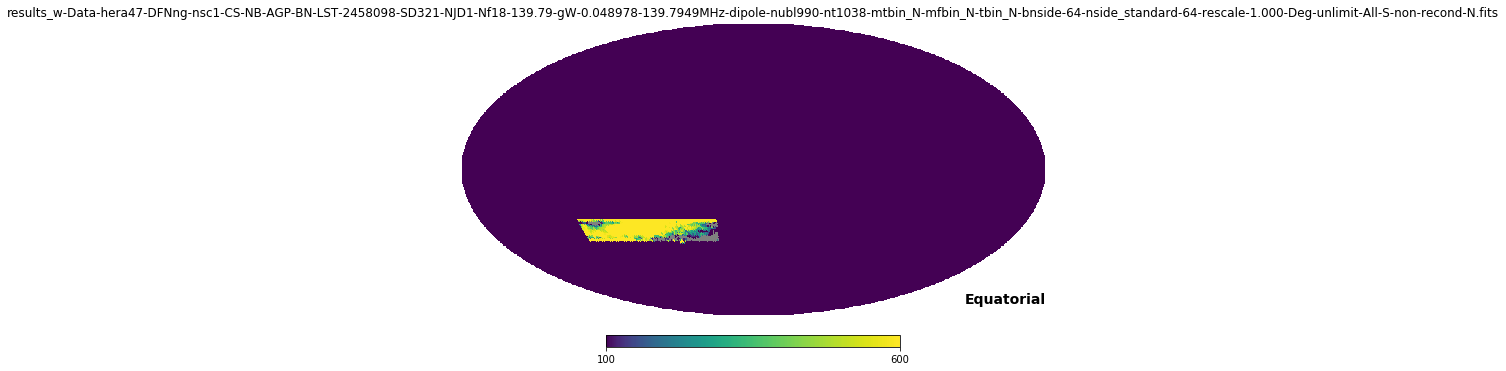

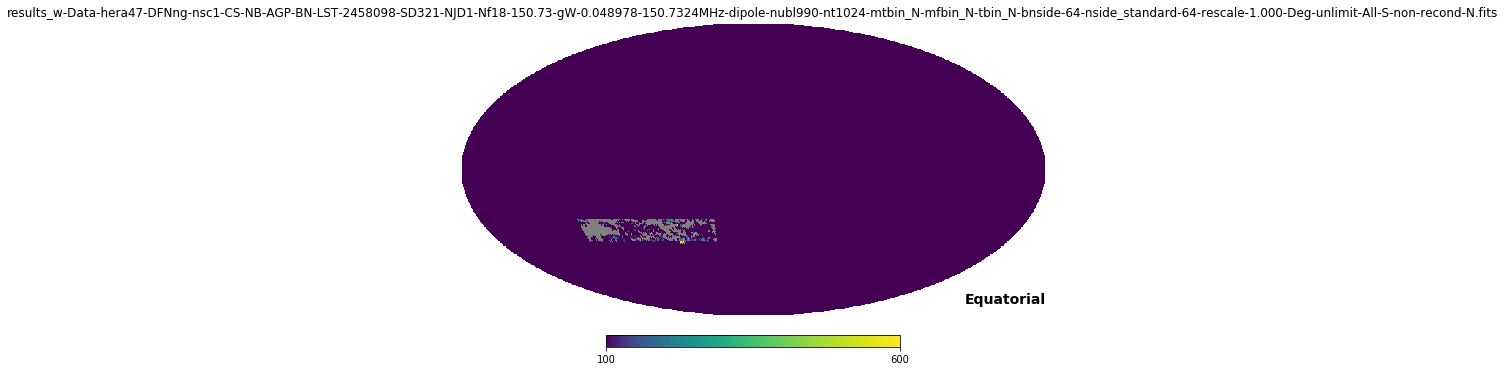

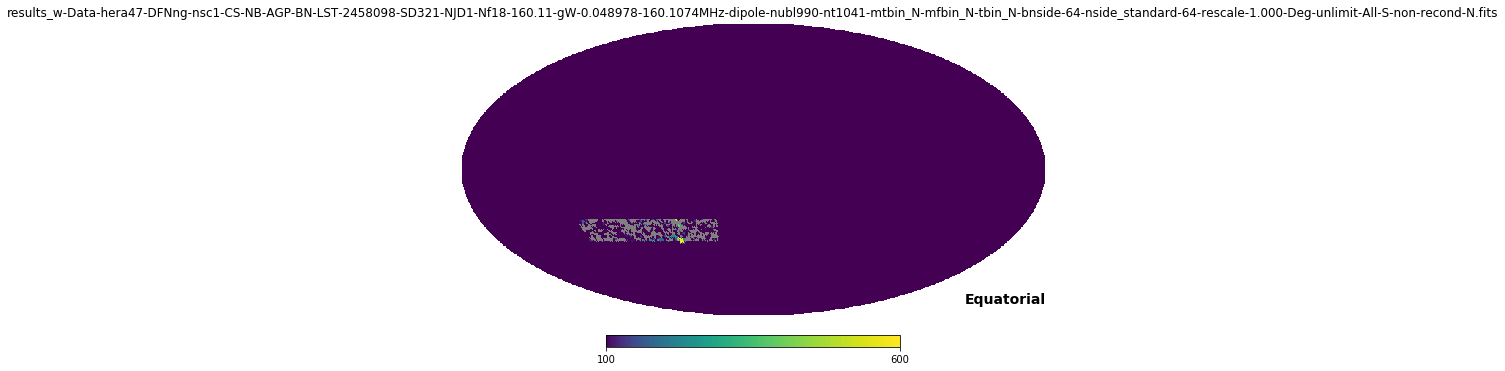

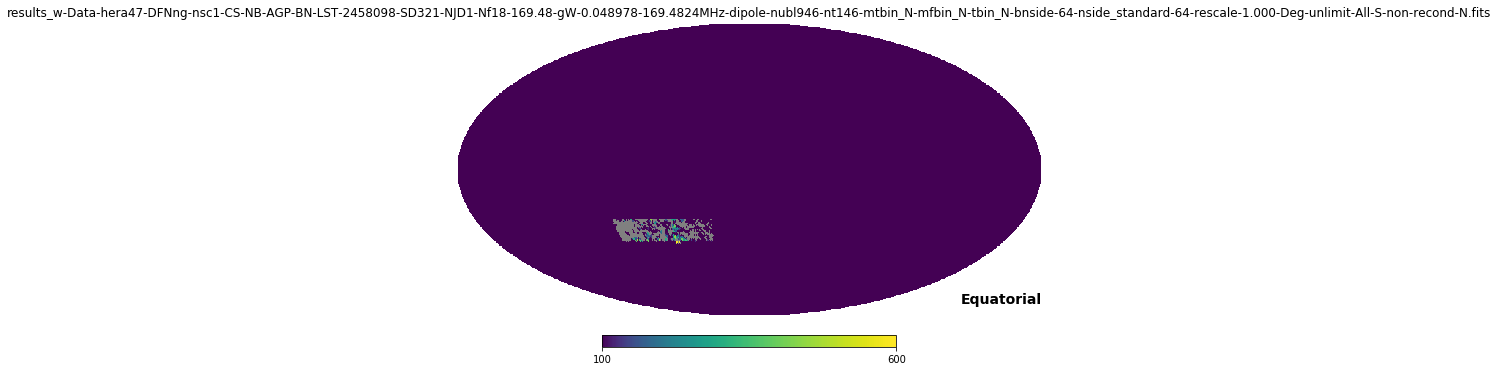

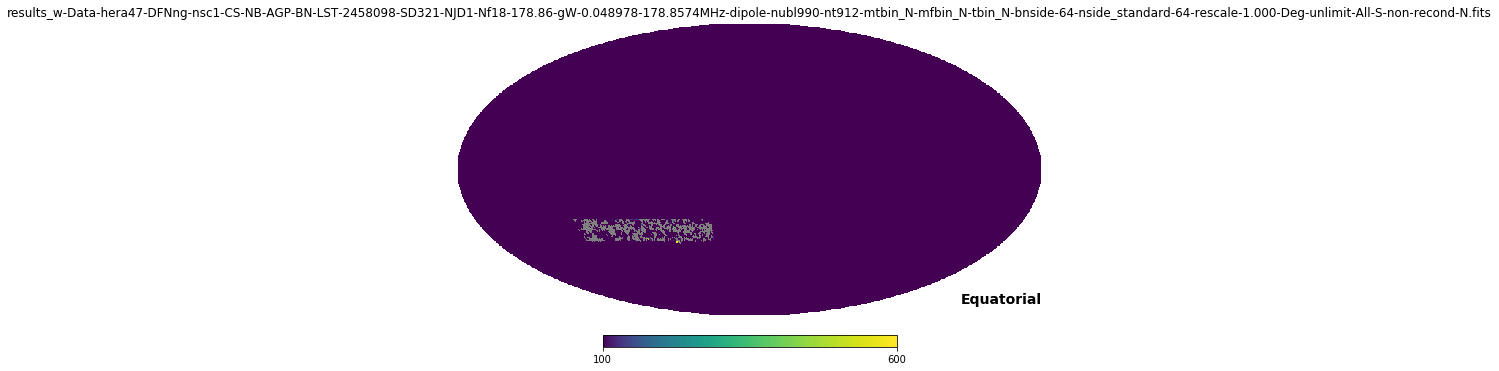

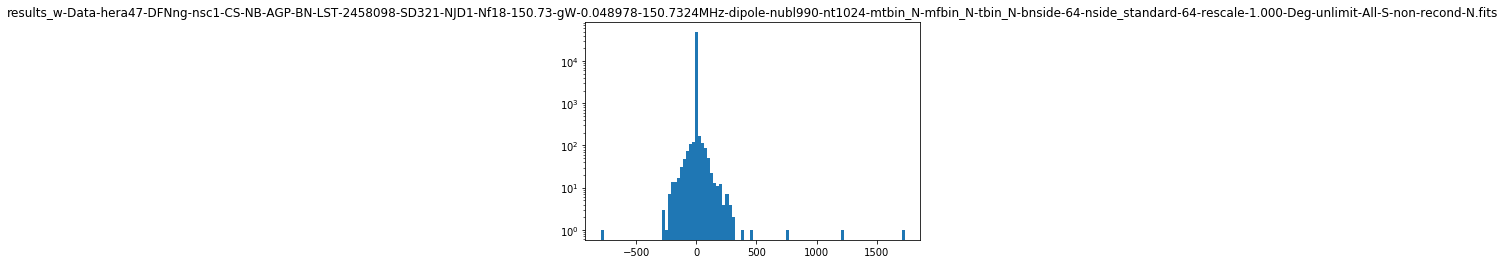

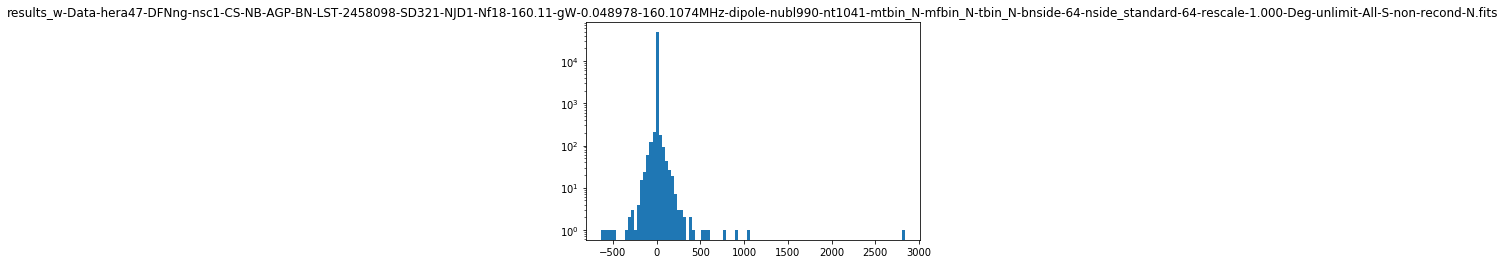

In [51]:
for id_file, fitfile in enumerate(filenames_64_321):
    name = fitfile.split('/')[-1]
    print(id_file, name)
    map_fit = fits.getdata(fitfile)
    plt.figure(150000 + id_file)
    plt.hist(map_fit, bins=100, log=True)
    plt.title(name)
    plt.show()
    #plt.close()
    plt.figure(550000 + id_file)
    hp.mollview(map_fit, title=name, norm='log', min=100, max=600, coord='C', nest=True)
    #hp.graticule(dmer=30., dpar=30.)
    plt.show()
    #plt.close()

Filename: /Users/JianshuLi/anaconda3/envs/Cosmology-Python27/lib/python2.7/site-packages/HERA_MapMaking_VisibilitySimulation/data/R_GSM_NoMask-Freq150.7324MHz-Nside_Standard32-Eq.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   (12288,)   float64   
Data shape, min, max:  (12288,) 123.393245559361 7350.223968374633
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


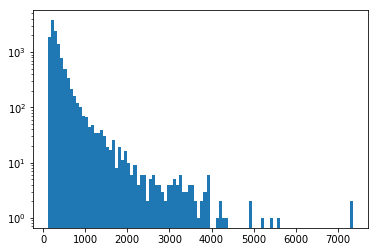

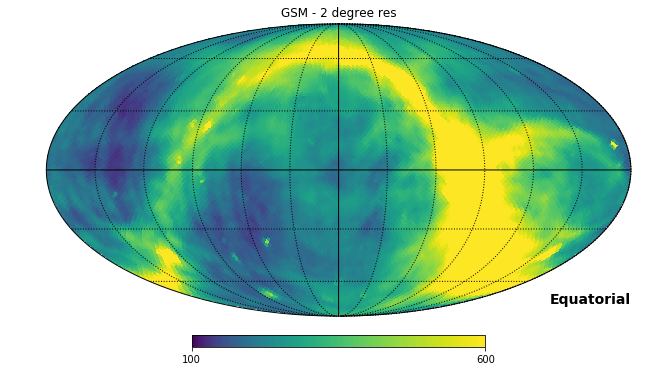

In [11]:
# GSM map with two degrees resolution
GSM32_path = DATA_PATH + '/R_GSM_NoMask-Freq150.7324MHz-Nside_Standard32-Eq.fits'
hdul = fits.open(GSM32_path)
hdul.info()
hdr = hdul[0].header
data = hdul[0].data
hdr
print 'Data shape, min, max: ',data.shape, min(data), max(data)
testmap = fits.getdata(GSM32_path)
plt.hist(testmap,bins=100,log=True)
hp.mollview(testmap, title="GSM - 2 degree res", norm='log', min=100, max=600, coord='C', nest=True)
hp.graticule(dmer=30,dpar=30)
hdul.close()

Filename: /Users/JianshuLi/anaconda3/envs/Cosmology-Python27/lib/python2.7/site-packages/HERA_MapMaking_VisibilitySimulation/data/R_GSM_NoMask-Freq150.7324MHz-Nside_Standard64-Eq.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   (49152,)   float64   
Data shape, min, max:  (49152,) 119.61855093973735 12303.866180350538
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


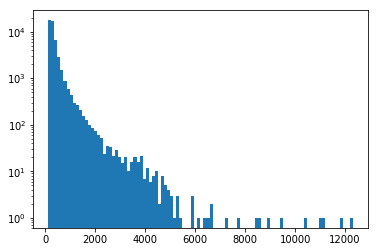

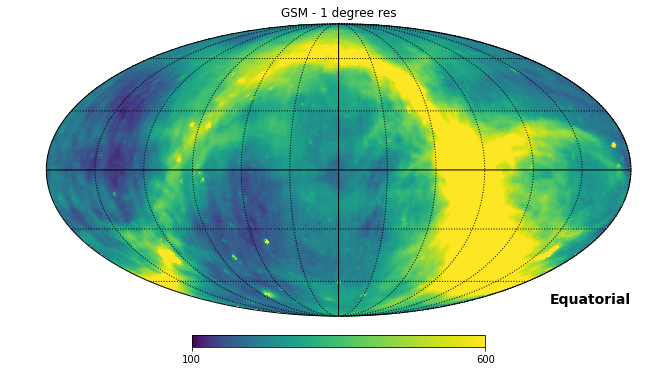

In [13]:
# GSM map with 1 degree resolution
GSM64_path = DATA_PATH + '/R_GSM_NoMask-Freq150.7324MHz-Nside_Standard64-Eq.fits'
hdul = fits.open(GSM64_path)
hdul.info()
hdr = hdul[0].header
data = hdul[0].data
hdr
print 'Data shape, min, max: ',data.shape, min(data), max(data)
testmap = fits.getdata(GSM64_path)
plt.hist(testmap,bins=100,log=True)
hp.mollview(testmap, title="GSM - 1 degree res", norm='log', min=100, max=600, coord='C', nest=True)
hp.graticule(dmer=30,dpar=30)
hdul.close()

In [23]:
testmap.max()

0.0

Filename: victor1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   (12288,)   float64   
Data shape, min, max:  (12288,) 0.0 525.8055325185119
80.0 160.0 -46.1880215352 46.1880215352
The interval between parallels is 10 deg 0.00'.
The interval between meridians is 10 deg 0.00'.


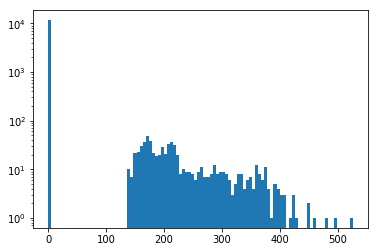

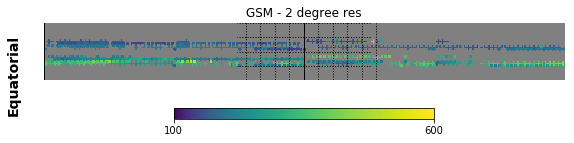

In [6]:
hdul = fits.open('victor1.fits')
hdul.info()
hdr = hdul[0].header
data = hdul[0].data
hdr
print 'Data shape, min, max: ',data.shape, min(data), max(data)
testmap = fits.getdata('victor1.fits')
plt.hist(testmap,bins=100,log=True)
hp.cartview(testmap, title="GSM - 2 degree res", norm='log', min=100, max=600, coord='C', latra=[-50,-10], xsize=360)
hp.graticule(dpar=10,dmer=10)
hdul.close()

Filename: victor2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   (49152,)   float64   
Data shape, min, max:  (49152,) 0.0 2307.918425457319
80.0 160.0 -46.1880215352 46.1880215352
The interval between parallels is 10 deg 0.00'.
The interval between meridians is 10 deg 0.00'.


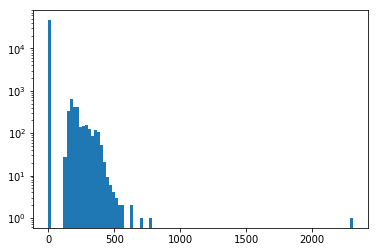

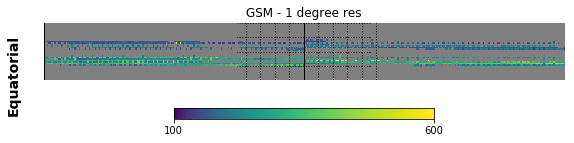

In [7]:
hdul = fits.open('victor2.fits')
hdul.info()
hdr = hdul[0].header
data = hdul[0].data
hdr
print 'Data shape, min, max: ',data.shape, min(data), max(data)
testmap = fits.getdata('victor2.fits')
plt.hist(testmap,bins=100,log=True)
hp.cartview(testmap, title="GSM - 1 degree res", norm='log', min=100, max=600, coord='C', latra=[-50,-10],xsize=360)
hp.graticule(dpar=10,dmer=10)
hdul.close()

In [8]:
datamat = np.zeros(4915200,dtype=float).reshape(49152,100)
print(datamat.shape)
datamat[:,0]=data
datamat[:,1]=data*2

(49152, 100)


Filename: victor3.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   (12288,)   float64   
Data shape, min, max:  (12288,) -258.2928860142555 972.5690826731519
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


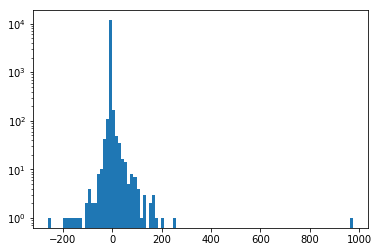

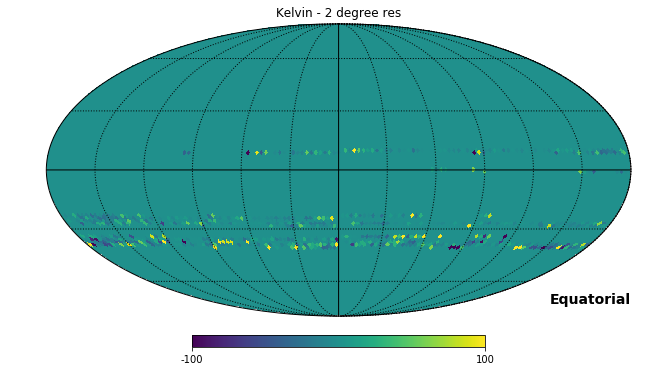

In [13]:
# Data map with two degrees resolution
hdul = fits.open('victor3.fits')
hdul.info()
hdr = hdul[0].header
data = hdul[0].data
hdr
print 'Data shape, min, max: ',data.shape, min(data), max(data)
testmap = fits.getdata('victor3.fits')
plt.hist(testmap,bins=100,log=True)
hp.mollview(testmap, title="Kelvin - 2 degree res", norm='none', min=-100, max=100, coord='C')
hp.graticule(dmer=30,dpar=30)
hdul.close()

Filename: victor4.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   (49152,)   float64   
Data shape, min, max:  (49152,) -884.4849174103163 2817.529642562779
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


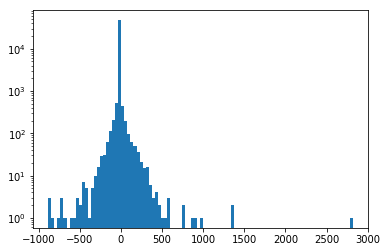

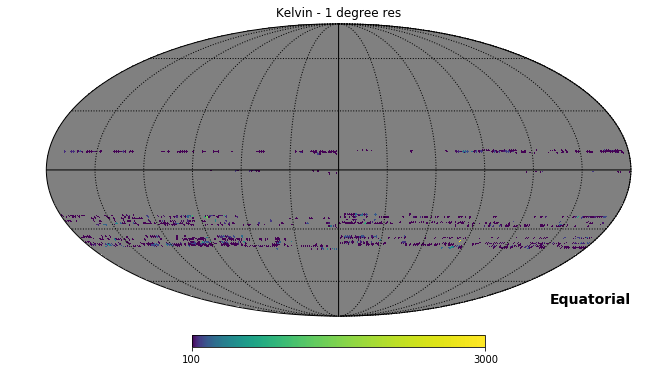

In [10]:
# Data map with one degree resolution
hdul = fits.open('victor4.fits')
hdul.info()
hdr = hdul[0].header
data = hdul[0].data
hdr
print 'Data shape, min, max: ',data.shape, min(data), max(data)
testmap = fits.getdata('victor4.fits')
plt.hist(testmap,bins=100,log=True)
hp.mollview(testmap, title="Kelvin - 1 degree res", norm='log', min=100, max=3000, coord='C')
hp.graticule(dmer=30,dpar=30)
hdul.close()

Filename: victor3.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   (12288,)   float64   
Data shape, min, max:  (12288,) -258.2928860142555 972.5690826731519
80.0 160.0 -46.1880215352 46.1880215352
The interval between parallels is 10 deg 0.00'.
The interval between meridians is 10 deg 0.00'.


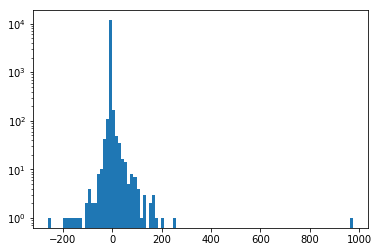

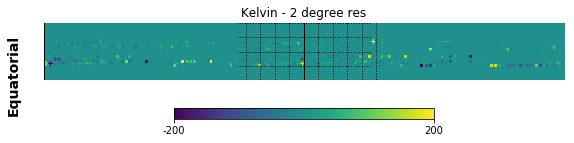

In [11]:
hdul = fits.open('victor3.fits')
hdul.info()
hdr = hdul[0].header
data = hdul[0].data
hdr
print 'Data shape, min, max: ',data.shape, min(data), max(data)
testmap = fits.getdata('victor3.fits')
plt.hist(testmap,bins=100,log=True)
hp.cartview(testmap, title="Kelvin - 2 degree res", norm='none', min=-200, max=200, coord='C', latra=[-50,-10], xsize=360)
hp.graticule(dpar=10,dmer=10)
hdul.close()

Filename: victor4.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   (49152,)   float64   
Data shape, min, max:  (49152,) -884.4849174103163 2817.529642562779
80.0 160.0 -46.1880215352 46.1880215352
The interval between parallels is 10 deg 0.00'.
The interval between meridians is 10 deg 0.00'.


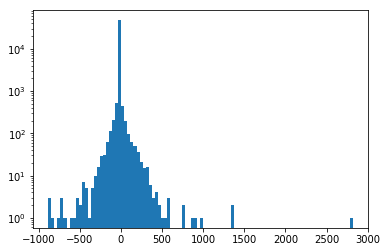

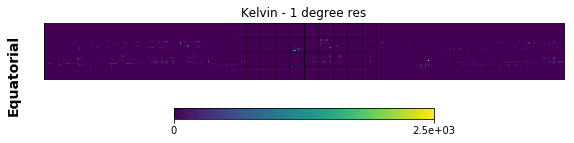

In [12]:
hdul = fits.open('victor4.fits')
hdul.info()
hdr = hdul[0].header
data = hdul[0].data
hdr
print 'Data shape, min, max: ',data.shape, min(data), max(data)
testmap = fits.getdata('victor4.fits')
plt.hist(testmap,bins=100,log=True)
hp.cartview(testmap, title="Kelvin - 1 degree res", norm='none', min=0, max=2500, coord='C', latra=[-50,-10], xsize=360)
hp.graticule(dpar=10,dmer=10)
hdul.close()